### 4.1 회귀분석 예제¶

특정한 입력변수값을 사용하여 출력변수의 값을 계산하는 것을 예측(prediction)문제라고 한다. 예측문제 중에서 출력변수의 값이 연속값인 문제를 회귀(regression) 또는 회귀분석(regression analysis) 문제라고 한다. 이 절에서는 회귀분석의 몇가지 예를 들어본다.

보스턴 집값 예측¶
sklearn 패키지의 datasets 서브패키지는 회귀분석을 공부하기 위한 예제를 제공한다. 그 중 load_boston() 명령으로 받을 수 있는 보스턴 주택 가격 데이터는 다음과 같은 데이터이다. 보스턴의 506개 타운(town)의 13개 독립변수값로부터 해당 타운의 주택가격 중앙값을 예측하는 문제다. 사용할 수 있는 특징 데이터는 다음과 같다.

독립변수

CRIM: 범죄율

INDUS: 비소매상업지역 면적 비율

NOX: 일산화질소 농도

RM: 주택당 방 수

LSTAT: 인구 중 하위 계층 비율

B: 인구 중 흑인 비율

PTRATIO: 학생/교사 비율

ZN: 25,000 평방피트를 초과 거주지역 비율

CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0

AGE: 1940년 이전에 건축된 주택의 비율

RAD: 방사형 고속도로까지의 거리

DIS: 직업센터의 거리

TAX: 재산세율

종속변수

보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

load_boston 명령으로 받는 데이터 집합은 Bunch 라는 클래스 객체로 생성된다. 이 클래스 객체는 다음과 같은 속성을 가진다.

data: 독립변수 ndarray 배열

target: 종속변수 ndarray 배열

feature_names: 독립변수 이름 리스트

target_names: (옵션) 종속변수 이름 리스트

DESCR: (옵션) 자료에 대한 설명 문자열

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

분석할 데이터는 pandas 데이터프레임 형태로 만들어야 한다. 여기에서는 독립변수 행렬을 dfX로, 종속변수 벡터를 dfy로 만든다. 종속변수의 이름은 MEDV로 지정한다.

In [2]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

독립변수과 종속변수 데이터프레임을 하나의 데이터프레임으로 묶어두면 편리하다.

In [5]:
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


일부 독립변수와 종속변수의 관계를 스캐터플롯(scatter plot)으로 살펴보자.

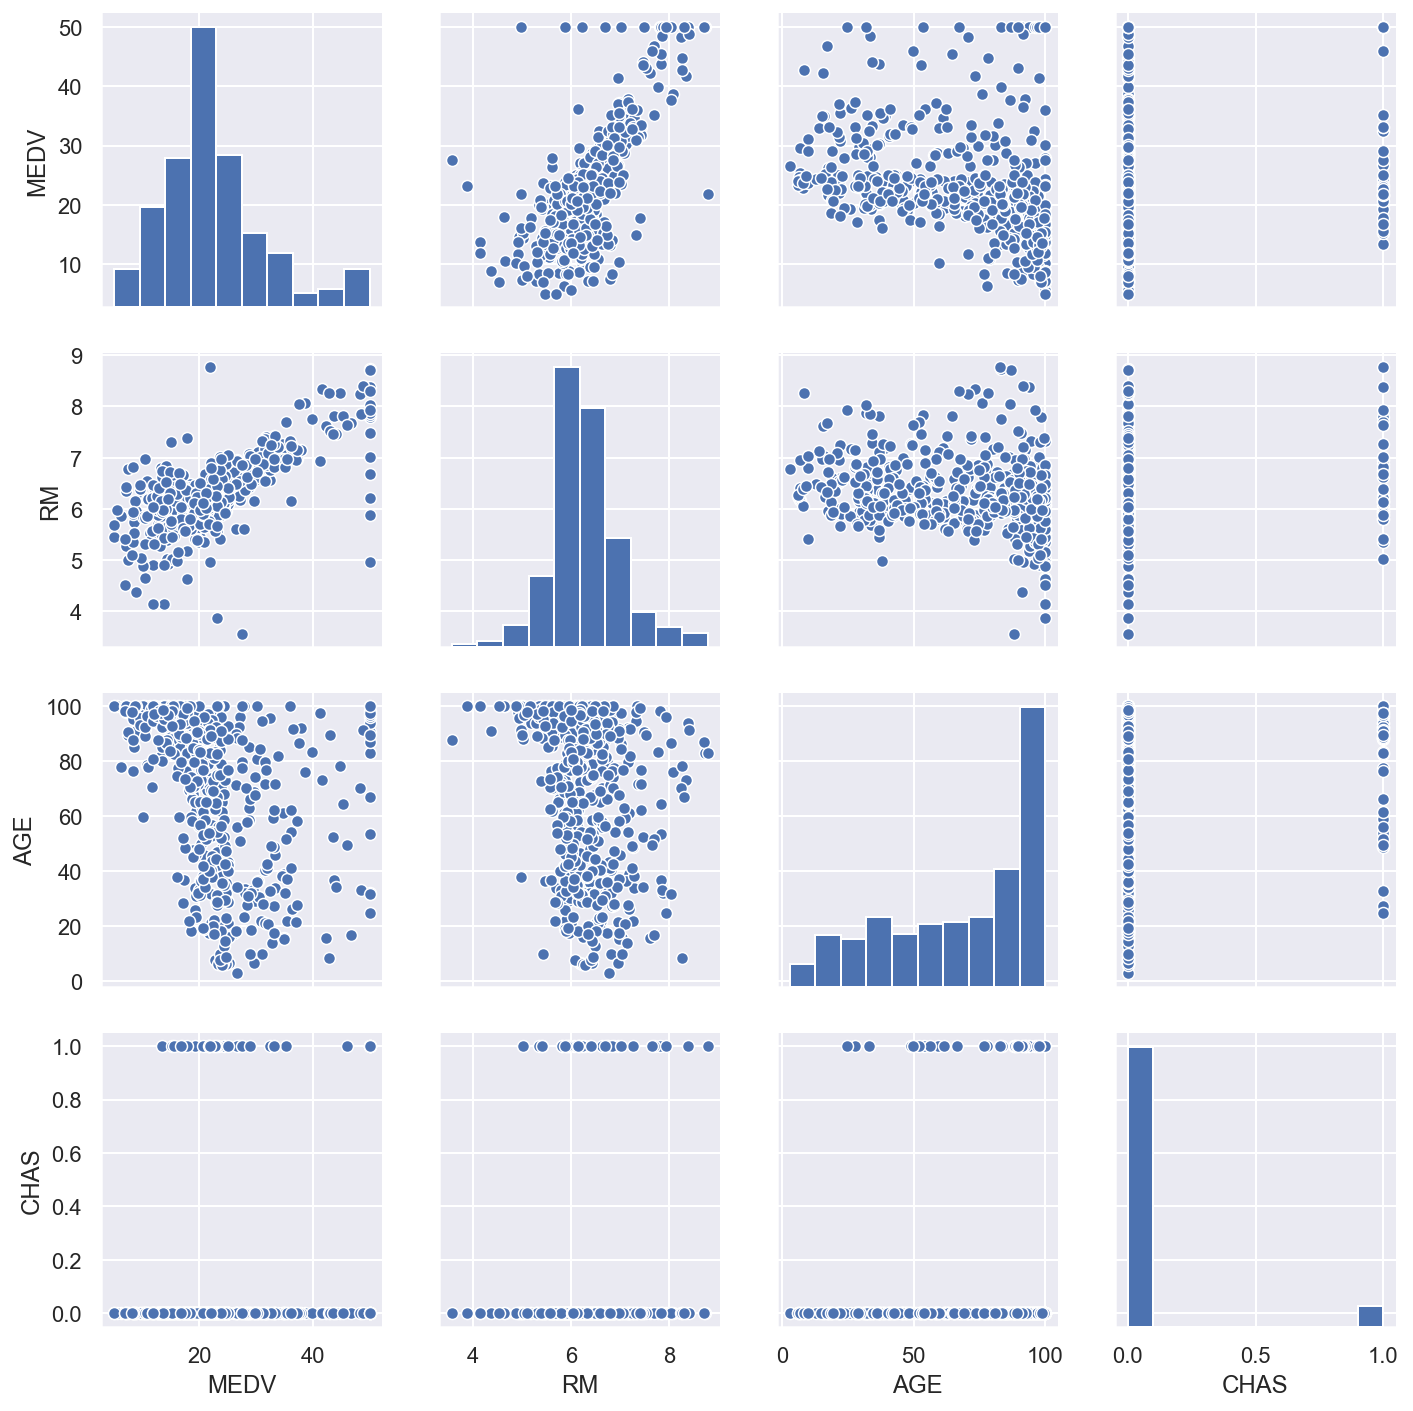

In [6]:
sns.pairplot(df[["MEDV", "RM", "AGE", "CHAS"]])
plt.show()


이 플롯의 첫 행을 보면 종속변수인 집값(MEDV)과 방 개수(RM), 노후화 정도(AGE)와 어떤 관계를 가지는지 알 수 있다.

방 개수가 증가할 수록 집값은 증가하는 경향이 뚜렷하다.

노후화 정도와 집값은 관계가 없어 보인다.

또한 스케터플롯의 모양으로부터 찰스강 유역 여부(CHAS)는 범주값이며 값이 1이면 0일 때 보다 집값의 평균이 더 높아지는 것도 볼 수 있다.



### 당뇨병 진행도 예측
scikit-learn 패키지가 제공하는 당뇨병 진행도 예측용 데이터는 442명의 당뇨병 환자를 대상으로한 검사 결과를 나타내는 데이터이다.

다음과 같은 10 종류의 독립변수를 가지고 있다. 독립변수의 값들은 모두 스케일링(scaling)되었다.

age: 나이

sex: 성별

bmi: BMI(Body mass index)지수

bp: 평균혈압

s1~s6: 6종류의 혈액검사수치

종속변수는 1년 뒤 측정한 당뇨병의 진행률이다.

In [7]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


스케터플롯을 그려보면 독립변수인 BMI지수와 평균혈압이 종속변수인 당뇨병 진행도와 양의 상관관계를 가지는 것을 볼 수 있다. 또한 두 독립변수 BMI지수와 평균혈압도 서로 양의 상관관계를 가진다. 이렇게 독립변수끼리 상관관계를 가지는 것을 다중공선성(multicolinearity)이라고 한다. 다중공선성은 회귀분석의 결과에 영향을 미칠 수 있다.

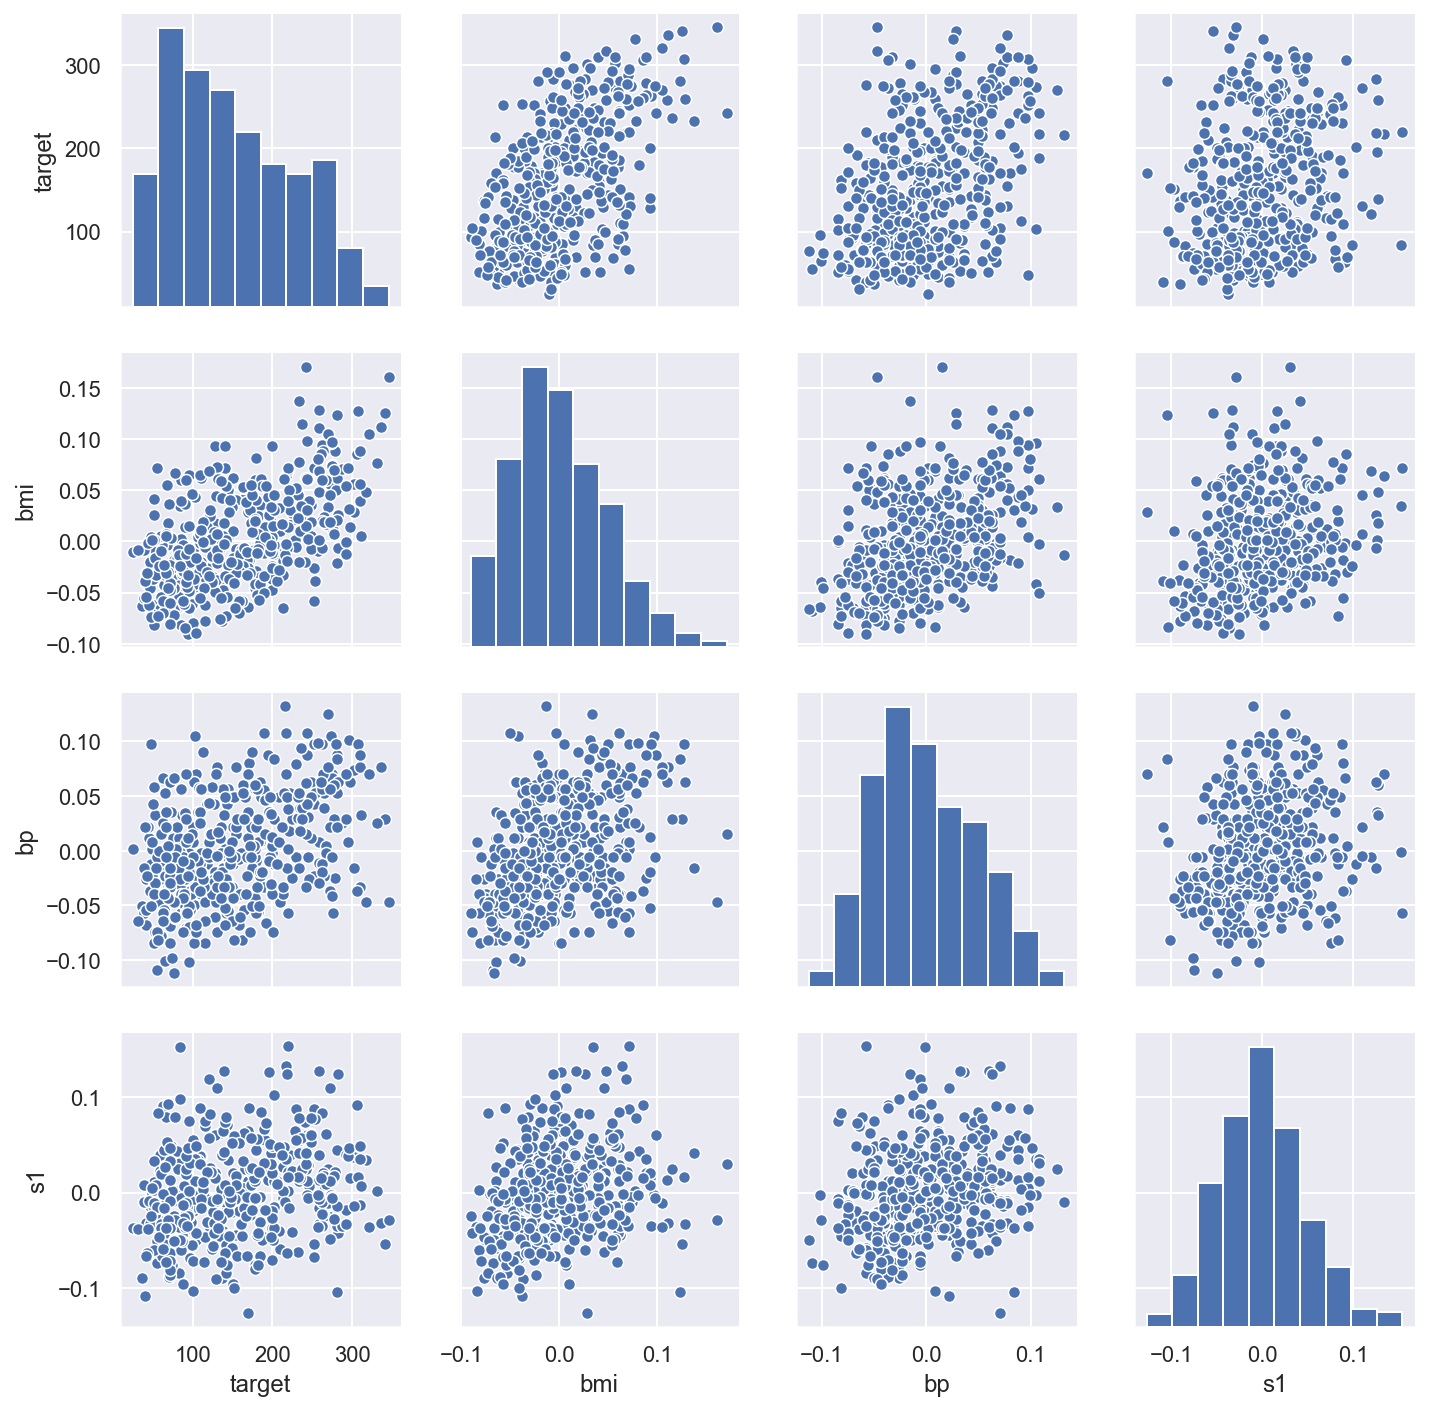

In [8]:
sns.pairplot(df[["target", "bmi", "bp", "s1"]])
plt.show()

### 가상 데이터 예측

실제 데이터를 다룰 때는 문제가 있음. 정답을 모르는 상태에서 문제를 풀기 때문에 정답을 맞췄는지 안맞췄는지 알기가 어려움. <br>
실제데이터 다루기 이전에 가상데이터를 자주 다룸. <br>
정답을 가지고 있는 가상 데이터




scikit-learn 패키지는 가상의 회귀분석 문제를 만들어주는 `make_regression()` 명령도 제공한다. 사용법은 다음과 같다.

```
X, y, w = make_regression(n_samples, n_features, bias, noise, random_state, coef=True)
```

 * `n_samples` : 정수 (옵션, 디폴트 100)
    * 표본 데이터의 갯수 $N$
 * `n_features` : 정수 (옵션, 디폴트 100)
    * 독립변수(feature)의 수(차원) $M$
 * `bias` : 실수 (옵션, 디폴트 0)
    * y 절편
 * `noise` : 실수 (옵션, 디폴트 0)
    * 출력 즉, 종속변수에 더해지는 잡음 $\epsilon$의 표준편차
 * `random_state` : 정수 (옵션, 디폴트 None)
   * 난수 발생용 시드값 
 * `coef` : 불리언 (옵션, 디폴트 False)
   * True 이면 선형 모형의 계수도 출력, 이건 항상 True로 해야 정답을 같이 알려준다.

출력은 다음과 같다.

 * `X` : [`n_samples`, `n_features`] 형상의 2차원 배열(열 하나가 feature 1개, 행 1개가 데이터 1세트)
    * 독립변수의 표본 데이터 행렬 $X$
 * `y` : [`n_samples`] 형상의 1차원 배열
    * 종속변수의 표본 데이터 벡터 $y$
 * `w` : [`n_features`] 형상의 1차원 배열 또는 [`n_features`, `n_targets`] 형상의 2차원 배열 (옵션)
    * 선형 모형의 계수 벡터 $w$, 입력 인수 `coef`가 True 인 경우에만 출력됨

`make_regression()` 명령은 내부적으로 다음 과정을 거쳐 가상의 데이터를 만든다.

1. 독립변수 데이터 행렬 `X`를 무작위로 만든다.
2. 종속변수와 독립변수를 연결하는 가중치 벡터 `w`(이 w의 기울기 값이 우리가 찾고자 하는 것)를 무작위로 만든다.
3. `X`와  `w`를 내적하고 y절편 `b`(b는 내가 집어 넣는 값) 값을 더하여 독립변수와 완전선형인 종속변수 벡터 `y_0`를 만든다.
4. 기댓값이 0이고 표준편차가 `noise`인 정규분포를 이용하여 잡음 `epsilon`를 만든다.
5. 독립변수와 완전선형인 종속변수 벡터 `y_0`에 잡음 `epsilon`을 더해서 종속변수 데이터 $y$를 만든다.

$$ y = w^Tx + b + \epsilon $$

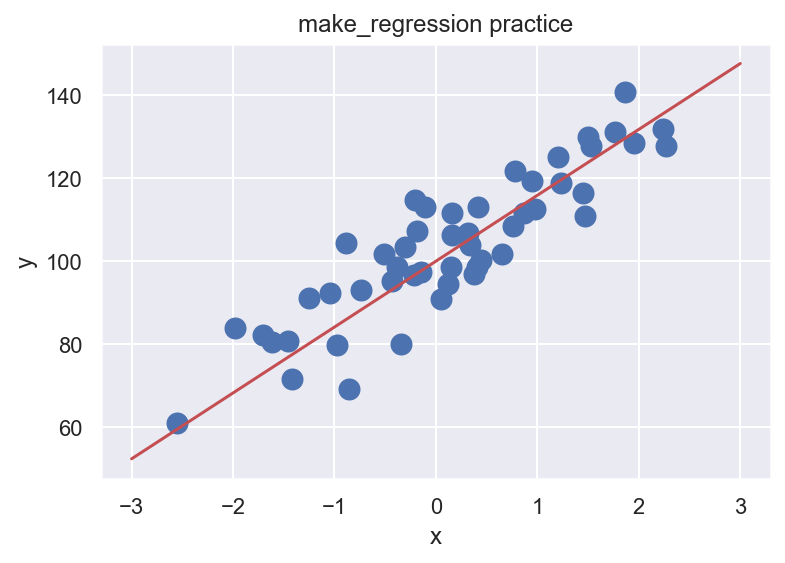

In [14]:
from sklearn.datasets import make_regression

# 데이터 50개 만들어라, 데이터 종류 1개, y절편 100, noise +- 표준편차가 10 정도 되게 놓겠다. coef는 w값을 출력을 해달라.
X, y, w = make_regression(
    n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0
)

xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("make_regression practice")
plt.show()


#### 연습 문제 4.1.2

`make_regression`과 같은 기능을 하는 함수 `make_regression2`를 만들어라. 단 `make_regression2`는 `coef=True,  n_features=1` 라고 가정한다. 즉 항상 가중치 계수를 반환하고 1차원 독립변수만 생성할 수 있다. 따라서 `make_regression2`는 다음과 같은 인수만 가진다.

* `n_samples`
* `bias`
* `noise`
* `random_state`

따라서 함수 사용법은 다음과 같아야 한다.

```
X, y, w = make_regression2(n_samples, bias, noise, random_state)
```

In [73]:
def make_regression2(n_samples, bias, noise, random_state=None):
        np.random.seed(random_state)
        X = np.random.normal(size=n_samples)
        w = 100*np.random.normal(size=1)
        y0 = X*w + bias
        e = 10*np.random.normal(scale=noise, size=n_samples)
        y = y0 + e
        return X, y, w
    
# noise를 +-10 되게 만들었는데, 
# w가 너무 작아서 기울기가 너무 작으면? 
# 노이즈가 10이랑 왔다갔다 하는데, 기울기 1이면 티가 안나
# 이것을 잘 조정 해야함. 

[141.33980179]


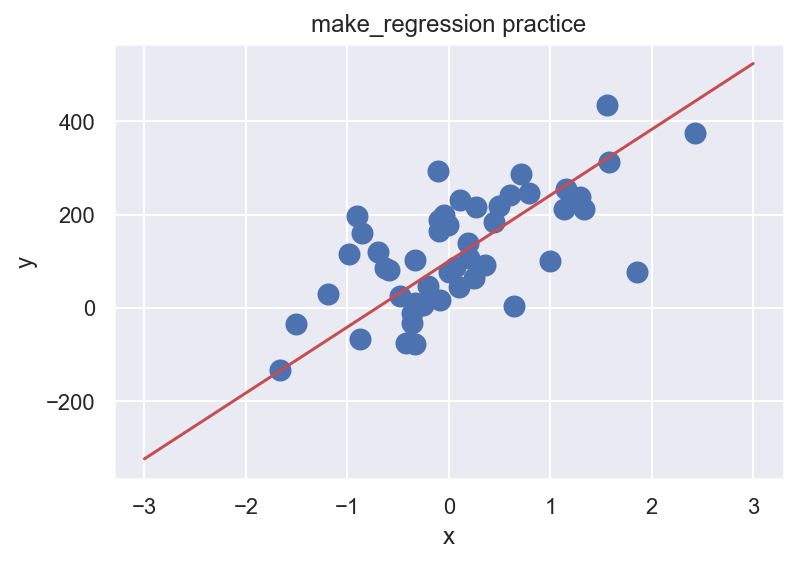

In [76]:
X, y, w = make_regression2(
    n_samples=50, bias=100, noise=10,  random_state=5)

xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("make_regression practice")
plt.show()

독립변수가 2개인 표본 데이터를 생성하여 스캐터플롯을 그리면 다음과 같다. 종속변숫값은 점의 명암으로 표시하였다. 점의 밝기가 밝으면 종속변숫값이 큰 것이고 점의 밝기가 어두우면 종속변숫값이 작은것이다. 스캐터플롯에서 **x1, x2가 증가할수록 종속변숫값이 커지는 것을 알 수 있다.**
<br>
"x1과 x2가 y에 영향을 미치는구나" 라는 사실을 알 수 있음. 

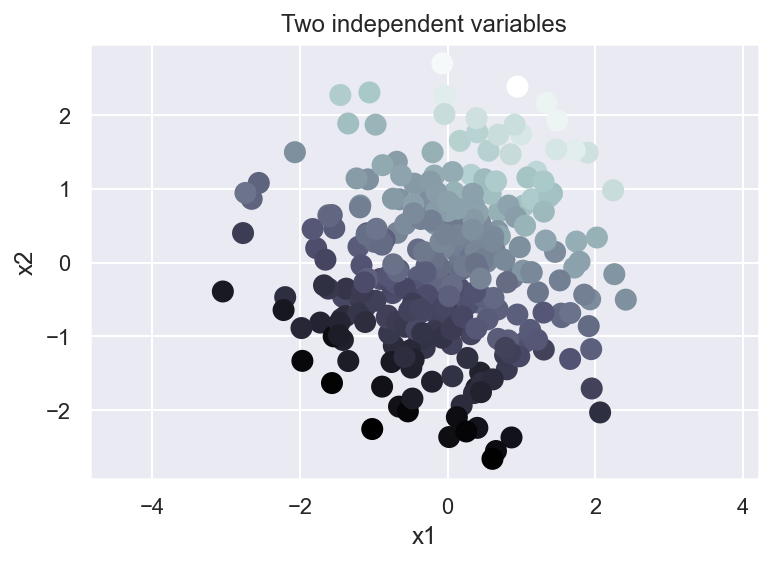

In [78]:
X, y, w = make_regression(
    n_samples=300, n_features=2, noise=10, coef=True, random_state=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("Two independent variables")
plt.show()

`make_regression` 명령은 위에서 설명한 인수 이외에도 다음과 같은 인수를 가질 수 있다.

* `n_informative` : 정수 (옵션, 디폴트 10)
    * 독립변수(feature) 중 실제로 종속변수와 상관 관계가 있는 독립변수의 수(차원)
* `effective_rank`: 정수 또는 None (옵션, 디폴트 None)
    * 독립변수(feature) 중 서로 독립인 독립변수의 수. 만약 None이면 모두 독립
* `tail_strength` : 0부터 1사이의 실수 (옵션, 디폴트 0.5)
    * `effective_rank`가 None이 아닌 경우 독립변수간의 상관관계를 결정하는 변수. 0.5면 독립변수간의 상관관계가 없다.

예를 들어 두 독립변수 중 실제로 종속변수에 영향을 미치는 독립변수는 하나 뿐이라면 다음처럼 `n_informative=1`로 설정한다. 스캐터플롯에서 독립변수 x1은 종속변수에 영향을 미치지 않는 것을 알 수 있다.

예를 들어, 아래처럼 `n_features=2, n_informative=1` 데이터 feature의 수는 2개인데, informative는 1이라고 설정하면, **두개의 독립변수 중에서 하나는 쓰레기 라는 뜻. 하나는 y값 정하는데 전혀 상관 없는애가 섞여있고, 하나만 영향을 미친다는 뜻** <br>
이거 지금 시뮬레이션 상황인거 기억 해야돼. 그렇게 된 데이터까지 만들어 준다는 거야.

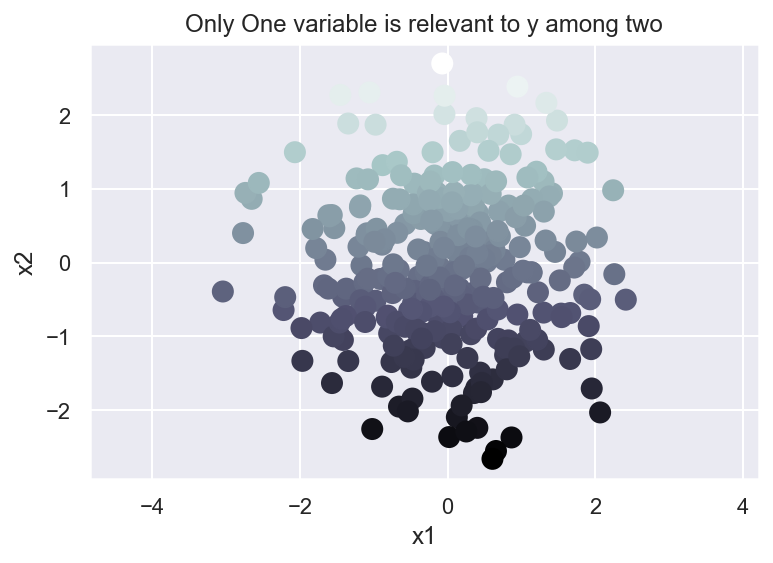

In [83]:
X, y, w = make_regression(
    n_samples=300, n_features=2, n_informative=1, noise=0, coef=True, random_state=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("Only One variable is relevant to y among two")
plt.show()

x2는 별로 상관이 없어 보이네

만약 두 독립변수가 서로 독립이 아니고 상관관계를 가지는 다중공선성 데이터를 만드는 경우에는 `tail_strength` 인수를 0에 가까운 작은 값으로 설정한다.<br>
x1, x2가 서로 상관관계를 가진 경우(다중공선성). 
이러면 회귀분석에 안좋은 영향을 미친다.

- effective_rank: 정수 또는 None (옵션, 디폴트 None)
    - 독립변수(feature) 중 서로 독립인 독립변수의 수. 만약 None이면 모두 독립
    - 아래서 1로 설정해놨는데, 그러면 rank 1행렬이라는 거지. rank를 적는거네. 
- tail_strength : 0부터 1사이의 실수 (옵션, 디폴트 0.5)
    - effective_rank가 None이 아닌 경우 독립변수간의 상관관계를 결정하는 변수. 0.5면 독립변수간의 상관관계가 없다.

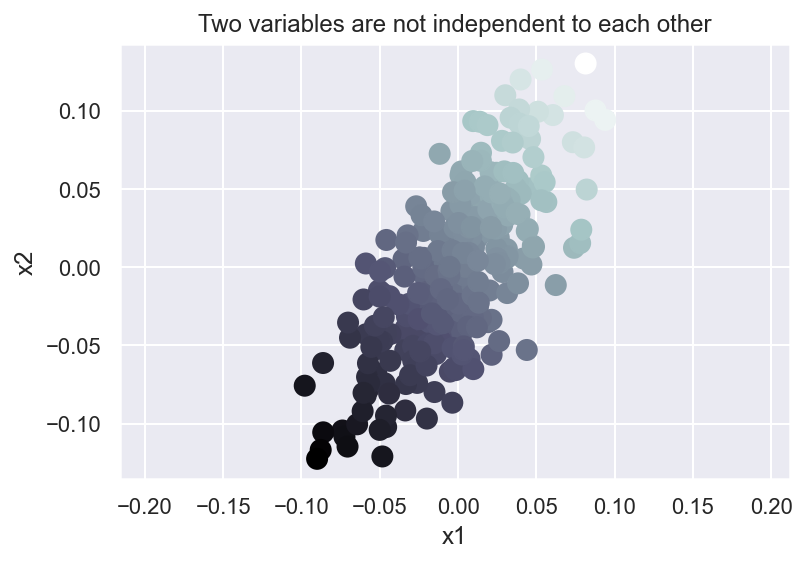

In [82]:
X, y, w = make_regression(
    n_samples=300, n_features=2, effective_rank=1, noise=0, coef=True, random_state=0,
    tail_strength=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("Two variables are not independent to each other")
plt.show()

## 4.2 선형회귀분석의 기초

회귀분석이라는 것은, x가 들어갔을 때 x를 어떤 함수에 넣어서 값을 출력했을 때, 그 함수값이 내가 원하는 y값이랑 가능한한 비슷하게 나오는 함수를 찾는 과정. 목표는 함수 f(x)를 찾는 과정<br>
함수의 종류는 너무 많음. 그런데, **선형회귀분석**은 그 함수의 종류를 **선형함수**로 국한시키겠다는 것. <br>
벡터식으로 줄이면, ***W.T*X***가 되겠지. <br>
그런데, w0가 끼어들어가있네. 그걸 떼낼 방법은 없을까? 하다가, 상수항 결합이라는 방식을 생각해 낸 것. <br><br><br>

회귀분석은 독립변수 $x$에 대응하는 종속변수 $y$와 가장 비슷한 값 $\hat{y}$를 출력하는 함수 $f(x)$를 찾는 과정이다. 

$$ 
\hat{y} = f \left( x \right) \approx y 
$$

만약 $f(x)$가 다음과 같은 선형함수면 이 함수를 **선형회귀모형(linear regression model)**이라고 한다. 선형회귀모형을 사용하는 회귀분석은 선형회귀분석이라고 한다.

$$ 
\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D = w_0 + w^Tx 
$$

위 식에서 독립변수 $x=(x_1, x_2, \ldots, x_D)$는 $D$차원 벡터다. 가중치 벡터 $w=(w_0, \cdots, w_D)$는 함수 $f(x)$의 계수(coefficient)이자 이 선형회귀모형의 **모수(parameter)**라고 한다. 

### 상수항 결합

우리가 수집한 데이터는 사실, X1~Xm까지 있었던 건데, 맨 앞에 1을 붙이는 것. 

회귀분석모형 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수 데이터에 추가하는 것을 **상수항 결합**(bias augmentation)작업이라고 한다.

$$
x_i =
\begin{bmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}
\rightarrow 
x_{i,a} =
\begin{bmatrix}
1 \\ x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}
$$

상수항 결합을 하게 되면 모든 원소가 1인 벡터가 입력 데이터 행렬에 추가된다.

$$
X =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1D} \\
x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots \\
x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
\rightarrow 
X_a =
\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1D} \\
1 & x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
$$

이렇게 되면 전체 수식이 다음과 같이 상수항이 추가된 가중치 벡터 $w$와 상수항이 추가된 입력 데이터 벡터 $x$의 내적으로 간단히 표시된다.

$$ f(x) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D
= 
\begin{bmatrix}
1 & x_1 & x_2 & \cdots & x_D
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_D
\end{bmatrix}
= x_a^T w_a = w_a^T x_a
$$

일반적으로 선형회귀모형은 항상 상수항 결합을 하기 때문에 특별히 벡터 기호를 $x_a$ 또는 $w_a$라고 표시하지 않아도 상수항 결합이 되어있는 것으로 볼 수 있다.

이렇게 상수항 추가한 형태로 만들면, 식이 훨씬 쉬워짐. **X와 W 내적하면 끝.**

statsmodels 패키지는 상수항 결합을 위한 `add_constant` 함수를 제공한다.

In [85]:
X0 = np.arange(10).reshape(5, 2)
X0

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [86]:
import statsmodels.api as sm

X = sm.add_constant(X0)
X

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.],
       [1., 6., 7.],
       [1., 8., 9.]])

그럼 w를 어떻게 찾을 것인가?<br>
수학에서 역행렬 중에서, 의사역행렬을 구했었음(교재 P.133). <br>
$$ 
w^{\ast} = (X^TX)^{-1} X^T y 
$$
그런데 그때 공부할 때는, 중간 과정을 구하지 않았었음.<br>
증명하면 아래와 같음.<br>


우리는 e가 0으로 가기를 원해. 그런데, e는 벡터인데 벡터가 0에 가까이 간다는게 무슨 말이지?<br>
즉 벡터가 0벡터에 가까이 가있으면 됨. 크기가 0이면 돼. <br>
놈을 얘기하는 거지. `"벡터의 제곱합은 벡터의 놈의 제곱"`<br>
그 벡터의 제곱합을 **RSS(잔차제곱합)** 이라는 용어로 부르게 된다. <br>
$$
\begin{aligned}
\text{RSS}
&=  e^Te \\
&= (y - Xw)^T(y - Xw) \\
&= y^Ty - 2y^T X w + w^TX^TXw  
\end{aligned}
$$
거기다 다시 원래 잔차의 정의를 대입. 

$$
\begin{aligned}
\text{RSS}
&= y^Ty - 2y^T X w + w^TX^TXw  
\end{aligned}
$$
<br>
***결국은 얘를 가장 작게하는 W값을 찾으면 되는 문제, W빼고 나머지는 우리가 다 알고 있어.***<br>
이제 최적화 문제가 됬음. <br>
최적화 문제는 어떻게 풀지? **미지수로 미분한 gradient vector가 0이 되면 됨.**<br>
W로 미분 해보자. 

![1_7.jpeg](./materials/1_7.jpeg)

참고로 X가 풀랭크가 아니면,<br> 
det(X) = 0 => det(X * X.T) = det(X) x det(X.T) = 0

### 최소자승법

최소자승법(OLS: Ordinary Least Squares)는 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 구하는 방법이다. 

우리가 사용하는 예측 모형은 다음과 같이 상수항이 결합된 선형모형이다.

$$ \hat{y} = Xw $$

이때 잔차 벡터(residual vector) $e$는 

$$ e = {y} - \hat{y} = y - Xw $$

이고 잔차 제곱합(RSS:residual sum of squares)은

$$
\begin{aligned}
\text{RSS}
&=  e^Te \\
&= (y - Xw)^T(y - Xw) \\
&= y^Ty - 2y^T X w + w^TX^TXw  
\end{aligned}
$$

이다. 잔차의 크기(잔차 제곱합)를 가장 작게 하는 가중치 벡터를 구하기 위해 이 식을 미분하여 잔차 제곱합의 그레디언트(gradient) 벡터를 구하면 다음과 같다.

$$ 
\dfrac{d \text{RSS}}{d w} = -2 X^T y + 2 X^TX w 
$$

잔차가 최소가 되는 최적화 조건은 그레디언트 벡터가 0벡터이어야 하므로 다음 식이 성립한다.

$$ 
\dfrac{d \text{RSS}}{d w} = 0 
$$

$$ 
X^TX w^{\ast} = X^T y 
$$

만약 $X^TX$ 행렬의 역행렬이 존재한다면 다음처럼 최적 가중치 벡터 $w^{\ast}$를 구할 수 있다.

$$ 
w^{\ast} = (X^TX)^{-1} X^T y 
$$

$X^TX$ 행렬의 역행렬이 존재하고 위에서 구한 값이 최저값이 되려면 잔차 제곱합의 헤시안 행렬인 $X^TX$가 양의 정부호(positive definite)이어야 한다.

$$ 
\frac{d^2 \text{RSS}}{dw^2} = 2X^TX > 0 
$$

$X$의 각 행렬이 서로 독립($X$가 풀랭크)이 아니면 $X^TX$가 양의 정부호가 아니고 역행렬이 존재하지 않으므로 위와 같은 해를 구할 수 없다.

### 직교 방정식

위에서 증명하는 과정에서 아래와 같은 식이 나왔었는데, 이게 중요한 식이라 이름도 붙어있음. 
$$ 
\dfrac{d \text{RSS}}{d w} = -2 X^T y + 2 X^TX w = 0
$$

여기에서 그레디언트가 0벡터가 되는 관계를 나타내는 다음 식을 **직교 방정식(normal equation)**이라고 한다.

$$ X^T y - X^TX w = 0 $$

$$ X^T (y - X w ) = 0 $$

$$ X^T e = 0 $$

즉, $c_d$가 모든 데이터의 $d$번째 차원의 원소로 이루어진 데이터 벡터(특징 행렬의 열벡터)라고 할 때 모든 차원 $d \; (d=0, \ldots, D)$에 대해  $c_d$는 잔차 벡터 $e$와 직교다.

$$ c_d^T e = 0 \;\;\; (d=0, \ldots, D) $$

또는 

$$ c_d \perp e \;\;\; (d=0, \ldots, D) $$

직교 방정식으로부터 다음과 같은 성질을 알 수 있다.

(1) 모형에 상수항이 있는 경우에 잔차 벡터의 원소의 합은 0이다. 즉, 잔차의 평균은 0이다.

$$ \sum_{i=0}^N e_i = 0 $$

(2) $x$ 데이터의 평균값 $\bar{x}$에 대한 예측값은 $y$ 데이터의 평균값 $\bar{y}$이다(우리가 예측한 y hat의 평균이 아니라, 실제 y의 평균이 나온다는 것).

$$ \bar{y} = w^T \bar{x} $$

1번 성질은 상수항 결합이 되어 있으면 $X$의 첫번째 열이 1-벡터라는 것을 이용하여 증명할 수 있다.

$$ c_0^T e = \mathbf{1}^T e = \sum_{i=0}^N e_i = 0 $$

2번 성질은 다음처럼 증명한다.

$$
\begin{aligned}
\bar{y} 
&= \dfrac{1}{N}\mathbf{1}^T y \\
&= \dfrac{1}{N}\mathbf{1}^T (Xw + e) \\
&= \dfrac{1}{N}\mathbf{1}^TXw + \dfrac{1}{N}\mathbf{1}^Te \\
&= \dfrac{1}{N}\mathbf{1}^TXw \\
&= \dfrac{1}{N}\mathbf{1}^T \begin{bmatrix}c_1 & \cdots & c_M \end{bmatrix} w \\
&= \begin{bmatrix}\dfrac{1}{N}\mathbf{1}^Tc_1 & \cdots & \dfrac{1}{N}\mathbf{1}^Tc_D \end{bmatrix} w \\
&= \begin{bmatrix}\bar{c}_1 & \cdots & \bar{c}_D \end{bmatrix} w \\
&= \bar{x}^T w \\
\end{aligned}
$$

![1_8.jpeg](./materials/1_8.jpeg)


회귀분석 하는방법 3가지

### NumPy를 이용한 선형 회귀분석

이제 NumPy의 선형대수 기능을 사용하여 OLS 방법으로 선형 회귀분석을 해보자.
우선 `make_regression` 명령을 사용하여 다음과 같이 1차원 특징 데이터 x와 이 값에 의존하는 y를 만든다.

In [118]:
from sklearn.datasets import make_regression

bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

우리가 준 바이어스 값은 100이고 `make_regression` 명령이 생성한 모수 값은 다음과 같다.

In [93]:
w

array(86.44794301)

따라서 x와 y는 다음과 같은 관계를 가진다.

$$ y = 100 + 86.44794301 x + \epsilon $$

위에서 구한 수식을 이용하여 선형회귀 계수를 추정하면 다음과 같다.

In [94]:
# OLS 해를 직접 이용하는 방법
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[99.79150869],
       [86.96171201]])

즉, 최소자승법으로 구한 선형회귀모형은 다음과 같다.

$$ 
\hat{y} = 99.79150869 + 86.96171201 x 
$$

이 결과에서 알 수 있는 것은 선형 회귀를 통해 구한 가중치 벡터는 **정답과 비슷하지만 똑같지는 않다**는 점이다.

완벽하게 똑같이는 안구해진다. <br>
noise를 넣은 것 때문에 그렇다. <br>
지금 방법에서는 만약 애초에 데이터 만들때 잡음을 뺏으면, 정확하게 동일한 값이 나왔을 것. 

이 식에 여러가지 $x$값을 대입하여 $\hat{y}$을 구해본 결과를 원래 데이터와 비교하면 다음 그림과 같다.

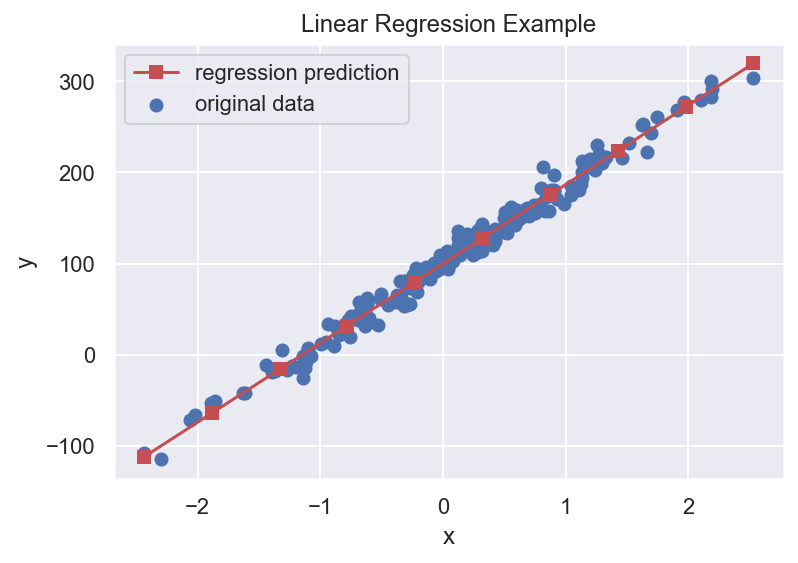

In [97]:
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new)  # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="original data")
plt.plot(x_new, y_new, 'rs-', label="regression prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Example")
plt.legend()
plt.show()

###  scikit-learn 패키지를 사용한  선형 회귀분석

scikit-learn 패키지를 사용하여 선형 회귀분석을 하는 경우에는 `linear_model` 서브 패키지의 `LinearRegression` 클래스를 사용한다. 사용법은 다음과 같다.


(1) `LinearRegression` 클래스 객체를 생성한다.

```
model = LinearRegression(fit_intercept=True)
```

`fit_intercept` 인수는 모형에 상수항이 있는가 없는가를 결정하는 인수이다. 디폴트 값이 `True`다. 만약 상수항이 없으면 `fit_intercept=False`로 설정한다.즉, **이 항목을 True로 놓게 되면 add_constant로 상수항 추가 안해도 알아서 추가해서 구해준다는 뜻.**



(2) `fit` 메서드로 가중치 값을 추정한다. 상수항 결합을 자동으로 해주므로 사용자가 직접 `add_constant` 등의 명령를 써서 상수항 결합을 할 필요는 없다.

```
model = model.fit(X, y)
```

`fit` 메서드를 호출하면 모형 객체는 다음과 같은 속성을 가지게 된다. 또한 `fit` 메서드는 객체 자신을 반환한다.

* `coef_` : 추정된 가중치 벡터(w값)
* `intercept_` : 추정된 상수항(w0값)



(3) `predict` 메서드로 새로운 입력 데이터에 대한 출력 데이터 예측

```
y_new = model.predict(x_new)
```

위 예제를 `LinearRegression` 클래스로 선형회귀를 하면 다음과 같다.

In [100]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X0, y)
print(model.intercept_, model.coef_)

[99.79150869] [[86.96171201]]


`predict` 메서드를 사용하면 새로운 $x_{new}$ 값에 대응하는 $y$ 값을 예측할 수 있다. $x_{new}$ 값으로 2차원 배열을 써야한다는 점을 주의한다.

In [101]:
# 반드시 2차원 배열로 넣어야 한다. 
model.predict([[-2], [-1], [0], [1], [2]])

array([[-74.13191534],
       [ 12.82979668],
       [ 99.79150869],
       [186.7532207 ],
       [273.71493272]])

In [102]:
model.coef_

array([[86.96171201]])

In [103]:
model.intercept_

array([99.79150869])

### statsmodels 패키지를 사용한 선형 회귀분석

statsmodels 패키지에서는 `OLS` 클래스를 사용하여 선형 회귀분석을 실시한다. `OLS` 클래스 사용법은 다음과 같다.

1. 독립변수와 종속변수가 ***모두 포함된 데이터프레임 생성***. 상수항 결함은 하지 않아도 된다. 


2. `OLS` 클래스 객체 생성. 이 때 from_formula 메서드의 인수로 종속변수와 독립변수를 지정하는 formula 문자열을 넣는다. 
   data 인수로는 독립변수와 종속변수가 모두 포함된 데이터프레임을 넣는다.
    ```
    model = OLS.from_formula(formula, data=df)
    ```
    또는 독립변수만 있는 데이터프레임 `dfX`와 종속변수만 있는 데이터프레임  `dfy`를 인수로 넣어서 만들 수도 있다. 이 때는 **독립변수만 있는 데이터프레임 `dfX`가 상수항을 가지고 있어야 한다.**
    
    ```
    model = OLS(dfy, dfX)
    ```
    
    
3. `fit` 메서드로 모형 추정. scikit-learn 패키지와 달리 추정 결과는 별도의 `RegressionResults` 클래스 객체로 출력된다.
    ```
    result = model.fit()
    ```

4. `RegressionResults` 클래스 객체는 결과 리포트용 `summary` 메서드와 예측을 위한 `prediction` 메서드를 제공한다. 주의해야 할 것이 결과로 나오는 클래스는 다른 클래스의 객체임. 
    ```
    print(result.summary())
    
    y_new = result.predict(x_new)
    ```
    이 때, 예측을 위한 데이터는 추정시와 동일하게 상수항 결합을 해 주어야 한다.

위 1차원 데이터 예제를 statsmodels의 `OLS` 명령으로 선형회귀를 하면 다음과 같다. 우선 독립변수와 종속변수가 모두 포함된 데이터프레임 생성. 상수항 결함은 하지 않아도 된다.

In [104]:
df = pd.DataFrame({"x": X0[:, 0], "y": y[:, 0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


다음으로 모델 객체를 만든다. 독립변수만 있는 데이터프레임 `dfX`와 종속변수만 있는 데이터프레임  `dfy`를 인수로 넣어서 만들 수도 있다. 이 때는 수동으로 상수항 추가를  해주어야 한다. 

In [105]:
dfy = df[["y"]]
dfX = sm.add_constant(df[["x"]])
model = sm.OLS(dfy, dfX)
result = model.fit()

또는 formula 문자열을 사용하여 모형을 만들 수도 있다. formula 문자열을 만드는 방법은 `~` 기호의 왼쪽에 종속변수의 이름을 넣고 `~` 기호의 오른쪽에 독립변수의 이름을 넣는다. 만약 독립변수가 여러개일 경우에는 patsy 패키지의  formula 문자열을 만드는 법을 따른다.

In [107]:
# 왼쪽이 종속변수, 오른쪽이 독립변수
model = sm.OLS.from_formula("y ~ x", data=df)
result = model.fit()

`RegressionResults` 클래스 객체의 `summary` 메서드는 복잡한 형태의 보고서를 보여준다. 보고서의 자세한 내용에 대해서는 확률적 회귀모형에서 추후 설명한다. 여기에서는 coef 열의 값이 가중치값이라는 것만 알면 된다.

In [108]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Sun, 15 Aug 2021   Prob (F-statistic):          8.17e-182
Time:                        22:17:48   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

`RegressionResults` 클래스 객체의 `predict` 메서드를 사용하면 새로운 $x_{new}$ 값에 대응하는 $y$ 값을 예측할 수 있다.

Predict에서 x의 이름까지 줘야 해서 딕셔너리로 줘야 함(데이터프레임으로 주는 것도 가능함). 

In [109]:
result.predict({"x": [-2, -1, 0, 1, 2] })

0    -74.131915
1     12.829797
2     99.791509
3    186.753221
4    273.714933
dtype: float64

`RegressionResults` 클래스는 분석 결과를 다양한 속성에 저장해주므로 추후 사용자가 선택하여 활용할 수 있다. 자주 사용되는 속성으로는 다음과 같은 것들이 있다.

* `params`: 가중치 벡터
* `resid`: 잔차 벡터

가중치 벡터의 값은 다음처럼 확인한다.

In [110]:
result.params

Intercept    99.791509
x            86.961712
dtype: float64

잔차 벡터의 형태는 다음과 같다.

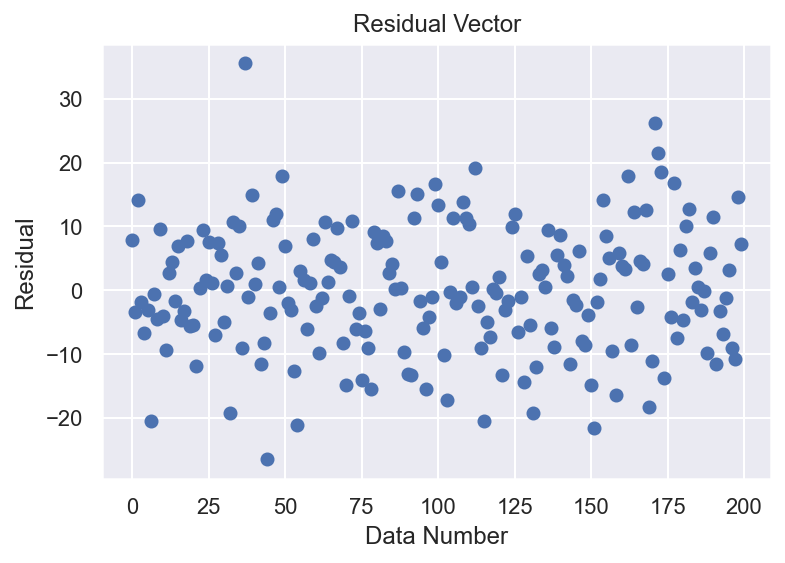

In [113]:
result.resid.plot(style="o")
plt.title("Residual Vector")
plt.xlabel("Data Number")
plt.ylabel("Residual")
plt.show()

직교방정식에서 나온 두 가지 성질이 성립하는지 살펴보자. 우선 잔차의 합을 구하면 0이라는 것을 알 수 있다.

In [114]:
result.resid.sum()

3.7196912217041245e-12

다음으로 x의 평균값을 넣으면 y의 평균값과 같은 값이 나온다는 것도 확인할 수 있다.

In [115]:
result.predict({"x": X0.mean()})

0    109.069351
dtype: float64

In [116]:
y.mean()

109.06935068170773

### 보스턴 집값 예측

보스턴 집값 데이터를 statsmodels의 `OLS` 명령으로 분석한 결과는 다음과 같다. 

In [117]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 15 Aug 2021   Prob (F-statistic):          6.72e-135
Time:                        22:22:29   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

따라서 보스턴 집값을 예측하는 식은 다음과 같다.

$$
\begin{aligned}
y &= 36.4595 - 0.1080\,\text{CRIM} + 0.0464\,\text{ZN}  + 0.0206\,\text{INDUS}  + 2.6867 \,\text{CHAS} \\
&  -17.7666\,\text{NOX}  + 3.8099\,\text{RM}  + 0.0007\,\text{AGE}  -1.4756\,\text{DIS} + 0.3060\,\text{RAD} \\
&  -0.0123\,\text{TAX}  -0.9527\,\text{PTRATIO}  + 0.0093 \,\text{B} -0.5248\,\text{LSTAT}
\end{aligned}
$$

## 4.3 스케일링

이 절에서는 회귀분석에 있어 필수적인 스케일링의 목적과 방법에 대해 공부한다.

### 조건수

보스턴 집값 데이터 예측문제를 statsmodels 패키지로 풀어 summary 리포트를 출력해보자. 

In [123]:
"MEDV ~ " + "+".join(boston.feature_names)

'MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [122]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

model1 = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 15 Aug 2021   Prob (F-statistic):          6.72e-135
Time:                        23:09:52   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

| Name                    | Description                                                  |
| ----------------------- | ------------------------------------------------------------ |
| Dep. Variable:  MEDV    | 종속변수                                                     |
| Model: OLS              | OLS방법론으로 시행                                           |
| Method: Least Squares   | OLS중에서도 Least Square라는 방법을 썻다.                    |
| No. Observations:   506 | 데이터의 갯수                                                |
| Df Residuals:  492      | 쓴 변수의 갯수 + 상수항 더하면 14개. 그 14개를 데이터갯수에서 빼준 값이 ***잔차의 자유도*** |
| Df Model:  13           | 쓴 변수의 갯수                                               |
|                         |                                                              |

### 하단의 경고메세지를 자세히 봐보자.

가장 하단에 다음과 같은 경고 메세지를 볼 수 있다. 

```
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
```

해석하면 다음과 같다.

```
조건수(conditiona number)가 15100으로 너무 큽니다. 
강한 다중공선성(multicollinearity)이나 다른 수치적 문제가 있을 수 있습니다.
```

행렬의 **조건수**(conditional number)는 가장 큰 고유치와 가장 작은 고유치의 비율을 뜻한다. 회귀분석에서는 공분산행렬 ***$X^TX$***의 가장 큰 고유치와 가장 작은 고유치의 비율이 된다. 즉, 가장 큰 고윳값과 가장 작은 고윳값의 비율을 의미한다.

분산행렬이 역행렬이 존재하려면, 모든 고윳값이 0보다 커야한다(양의 정부호). 그럼 회귀분석의 값이 나왔다는거는 역행렬이 존재한다는 거니깐, 람다의 max와 min둘다 양수. condition number도 양수. 


$$ \text{condition number} = \dfrac{\lambda_{\text{max}}}{\lambda_{\text{min}}} $$

여기에서는 다음 연립방정식을 예로 들어 설명을 하겠다.

$$ Ax = b $$

이런 연립방정식이 있을 때 행렬 $A$의 조건수가 크면 계수행렬 $A$와 상수벡터 $b$에 대한 해 $x$의 민감도가 커지고 따라서 계수행렬이나 상수벡터에 존재하는 오차가 해에 미치는 영향이 커진다. 


즉, 행렬 A의 condition number가 크게 되면, A나 b에 조금이라도 오차가 생기면, 해에 미치는 영향이 엄청 커진다. 민감성이 되게 민감해진다. 

조건수는 가장 작은 경우의 예는 행렬 $A$가 단위 행렬인 경우다. 이 때 조건수의 값은 1이다. 단위행렬의 경우에는 고윳값이 다 1. 

$$ \text{cond}(I) = 1 $$

In [120]:
A = np.eye(4)

이 행렬 $A$와 곱해져서 상수 벡터 $b$가 되는 벡터 $x$를 역행렬 $A^{-1}$을 사용하여 계산할 수 있다. 이 예에서는 상수 벡터 $b$가 1-벡터이다.

I*x = b -> x = b 해서 답 나온 것. 

In [126]:
b = np.ones(4)
x = sp.linalg.solve(A, b)
x

array([1., 1., 1., 1.])

만약 상수 벡터에 약간의 오차가 있었다면 연립방정식의 해에도 동일한 수준의 오차가 발행한다. 다음 코드과 실행결과는 행렬 $A$에 1/10000 오차가 있으면 해 $x$에도 유사한 정도의 오차가 생기는 것을 보이고 있다.

A가 원래 단위행렬이였는데, 그것을 1.0001로 다 바꿔놓은 것. 

In [125]:
x_error = sp.linalg.solve(A + 0.0001 * np.eye(4), b)
x_error

array([0.99990001, 0.99990001, 0.99990001, 0.99990001])

이번에는 다음과 같은 행렬을 생각하자. 

In [127]:
A = sp.linalg.hilbert(4)
A

array([[1.        , 0.5       , 0.33333333, 0.25      ],
       [0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.25      , 0.2       , 0.16666667, 0.14285714]])

이 행렬은 4차 힐버트 행렬(Hilbert matrix)이라는 행렬로 조건수가 15000이 넘는다.

In [128]:
np.linalg.cond(A)

15513.738738929038

이렇게 연립방정식을 이루는 행렬의 조건수가 커지면 상수항 오차가 작은 경우에도 해의 오차가 커지게 된다. 오차가 없는 경우의 해 $x$는 다음과 같다.

In [129]:
sp.linalg.solve(A, b)

array([  -4.,   60., -180.,  140.])

하지만 이 경우에는 계수행렬이나 상수벡터에 약간의 오차만 있어도 해가 전혀 다른 값을 가진다. 다음 코드는 계수행렬에 1/10000의 오차가 있을 때 해의 값이 전혀 달라지는 것을 보인다.

In [130]:
sp.linalg.solve(A + 0.0001 * np.eye(4), b)

array([ -0.58897672,  21.1225671 , -85.75912499,  78.45650825])

A를 고작 10000분의 1 변화시켰는데, 나오는 해의 크기가 거의 50%가 달라진 것. 

![1_10.jpeg](./materials/1_10.jpeg)

따라서 **공분산행렬 $X^TX$의  조건수가 크면 회귀분석을 사용한 예측값도 오차가 커진다.**

왜 $X^TX$가 공분산행렬일까? <br>
X의 각각 feature를 평균 0이 되도록 normalize하고, 데이터 수로 나눈 후에, 
$X^TX$를 하면 공분산 행렬이 나온다. <br>
[reference link](https://math.stackexchange.com/questions/2325713/why-multiply-a-matrix-with-its-transpose)

![1_17.jpeg](./materials/1_17.jpeg)

### 회귀분석과 조건수

즉, $X^TX$의 조건수가 크면, 우리가 쓴 데이터에 약간의 오차만 있어도 전혀 엉뚱한 답이 나와버린다는 것. <br>
현실적으로 예측이 안되버림. 그럴듯하게 나와서 해보면, 전혀 이상한 답이 나오는데 왜 그런지도 모르는 상황. <br>

우리가 지금 푸는 방정식은 <br>
$Xw = y$<br>
더 구체적으로 말하자면<br>
$ 
X^TX w^{\ast} = X^T y 
$

<br>
그러면, 이게 무슨말이냐면, $X^TX$ 조건수가 커지면, $X^TX$ 혹은 $X^Ty$값이 조금만 달라져도, w가 엄청 확확 달라진다는 소리임. <br>
즉, $X^TX$의 condition number가 커지면, X나 y에 조금만 오차가 있어도 w가 엄청나게 달라져 버린다. <br>

즉, 집값을 예측하는데, 원래 집값이 4억 5천 3백 45만원 이였는데, 4억 5천 3백 45만 천원 이라고 쓰는 순간 큰일난다는 뜻. 

#### 그럼 조건수는 왜 생기고 어떻게 해결해야 하는걸까? 

condition number는 고윳값의 비율이라고 했다. <br>
고윳값이라는 것은, 분포를 그려놨을 때, 각 방향의 폭이 고윳값이라고 했음. <br>
고윳값의 큰놈과 작은놈이 차이가 많이 나려면, 아래와 같이 길쭉하게 그려져 있는 경우. 

회귀분석에서 조건수가 커지는 경우는 크게 두 가지가 있다.

1. 변수들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우. 이 경우에는 스케일링(scaling)으로 해결한다.
1. 다중 공선성 즉, 상관관계가 큰 독립 변수들이 있는 경우, 이 경우에는 변수 선택이나 PCA를 사용한 차원 축소 등으로 해결한다.

이를 독립변수의 분포모양으로 설명하면 다음 그림과 같다.

![1_11.png](./materials/1_11.png)

**(1)의 케이스**: 서로 상관관계 없어도, 이렇게 어떤 데이터는 움직이는 폭이 굉장히 작은데 어떤 데이터는 움직이는 폭이 굉장히 크면 분포가 위처럼 된다. 
즉, 단위가 하나는 톤단위, 하나는 단위가 mg. 왔다갔다가 엄청 심하지. 스케일링을 해줘야 한다. 스케일링이라는 것은 표준편차를 1로 만들어주는 작업.  
각각을 자신의 표준편차로 나누는 것이 scaling
<br>
<br>
**(2)의 케이스** : x1과 x2가 강한 상관관계를 가지고 있다. 거의 같은 데이터라는 것. 완전히 똑같은 데이터면, 애초에 X가 full-rank가 아니라서 invertible하지 않음. 거의 거의 같은 값이면? 구해지긴 하는데, 위처럼 되는 거야. 그런 케이스를 ***다중공선성*** 이라고 부르는 것<br>
x1, x2가 선형독립이라서 계산 된다고 그냥 안심하면 돼. <br>


보스턴 집값 문제의 경우 각 독립변수들이 0.1 수준부터 100 수준까지 제각각의 크기를 가지고 있기 때문이다.

In [135]:
dfX.describe().loc["std"]

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
Name: std, dtype: float64

이렇게 독립변수가 스케일링 안되면 조건수가 커져서 예측 오차가 증폭될 가능성이 커진다. 이 효과를 확실하게 보기 위하여 일부러 다음처럼 TAX 변수를 크게 만들어 조건수를 증폭시켜 보았다. 

In [137]:
dfX2 = dfX.copy()
dfX2["TAX"] *= 1e13
df2 = pd.concat([dfX2, dfy], axis=1)

model2 = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     83.39
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           8.62e-44
Time:                        00:28:34   Log-Likelihood:                -1737.9
No. Observations:                 506   AIC:                             3484.
Df Residuals:                     502   BIC:                             3501.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0038      0.000     -8.543      0.0

조건수가 1000조 수준으로 증가한 것을 볼 수 있다. `R-squared`로 표시되는 성능지표도 크게 감소하였다. 이 성능지표에 대해서는 추후 분산분석에서 자세히 다룬다.

statsmodels에서는 모형지정 문자열에서 `scale()` 명령을 사용하여 스케일링을 할 수 있다. 이 방식으로 스케일을 하면 스케일링에 사용된 평균과 표준편차를 저장하였다가 나중에 `predict()` 명령을 사용할 때도 같은 스케일을 사용하기 때문에 편리하다. 카테고리 더미변수인 `CHAS`는 스케일을 하지 않는다는 점에 주의한다.

In [140]:
feature_names = list(boston.feature_names)
feature_names.remove("CHAS") 
feature_names = ["scale({})".format(name) for name in feature_names] + ["CHAS"]
model3 = sm.OLS.from_formula("MEDV ~ " + "+".join(feature_names), data=df2)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          6.72e-135
Time:                        00:30:20   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.3470      0.219    101.

스케일링만으로 조건수가 10.6이 된 것을 확인할 수 있다.

스케일링은 그냥 모든 회귀분석에서 디폴트임. 무조건 해야 하는 것. <br>
그래도 해결이 안되는 경우 다중공선성이 있는 경우는 변수를 버려야함. <br>
아니면 PCA등을 통해 차원축소를 고려해 볼 수 있지. 

## 4.4 범주형 독립변수

이 절에서는 범주형 독립변수를 가지는 경우의 회귀분석모형을 공부한다.<br>
더미변수라는게, 단순하게 2진수로 바꾸기만 하는 것이 아니다. one-hot encoding. <br>
왜 이렇게 해야 할까? <br>
이렇게 안하면, 나중에 회귀분석을 한 결과를 가지고 해석을 할 수가 없다. <br>

### 범주형 변수가 하나인 경우


$x_1, x_2, \ldots, x_D$라는 $D$개의 독립변수를 가지는 선형회귀모형을 생각하자.

$$ \hat{y} = w_0 + w_1x_1 + w_2x_2 + \cdots + w_Dx_D $$

여기에서 $x_1$이라는 독립변수만 범주형 변수이고 'A'과 'B'라는 두 가지의 범주값을 가질 수 있다고 하자. 

가장 간단한 방법은 전체 데이터를 $x_1=A$인 데이터와 $x_2=B$인 데이터 두 그룹으로 나누어 각각의 데이터에 대한 선형회귀모형을 만드는 것이다. 즉 다음과 같은 2개의 선형회귀모형을 만든다.

이게 사실 가장 쉬운 방법, x1은 필요가 없으니깐 빼고 아예 전체 데이터를 둘로 나눈 것.


$$ 
\text{model A}:\;\; \hat{y} = w_{A,0} \; + w_{A,2}x_2 + \cdots + w_{A,D}x_D \;\; (\text{if } x_1 = A) 
$$

$$ 
\text{model B}:\;\; \hat{y} = w_{B,0} \; + w_{B,2}x_2 + \cdots + w_{B,D}x_D \;\; (\text{if } x_1 = B) 
$$


그런데 올바른 선형회귀모형에서는 $x_1$이 아닌 다른 변수 예를 들어 $x_2$의 값이 변할 때 $y$값이 변화하는 정도, 즉 가중치 $w_2$는 $x_1$의 값이 A이든 B든 같아야 한다. 하지만 위와 같은 두 개의 선형회귀모형을 만들면 $w_2$의 값이 $w_{A,2}$와 $w_{B,2}$라는 두 가지의 다른 값이 나오므로 위 모형은 적당하지 않다.

***이렇게 하면 왜 틀리냐?***<br>
우리가 원했던 것은, 
$$ 
w_{2} + \cdots + w_{D} \;\;
$$
이런 W들을 구하는 거였는데, 모델을 나누면, W가 각 변수마다, 2개씩 나와버리잖아. <br>
그래서 데이터 나눠서 회귀분석 2번 하면 안된다는 거야. 

더미변수 방법은 범주형 변수 $x_1$을 $d_{1A}, d_{1B}$라는 두 개의 더미변수로 바꾸는 것이다. 더미변수는 상수항을 포함하기 때문에 더미변수로 변환하면 상수항은 없어진다. 

$$
\begin{aligned}
\hat{y} &= w_0 && + && \hspace{1cm} w_1 x_1          & +  w_2 x_2  + \cdots  + w_D x_D \\
        &      &&   && \hspace{1.2cm} \downarrow       &     \\
\hat{y} &=     &&   && w_{1A} d_{1A} + w_{1B} d_{1B} & +  w_2 x_2  + \cdots  + w_D x_D \\
\end{aligned}
$$

더미변수가 2개인 이유는 더미변수가 가질 수 있는 범주값이 2개이기 때문이다. 범주값이 $K$개이면 범주형 변수 $x_1$을 $d_{11}, \ldots, d_{1K}$라는 $K$개의 더미변수로 바꾸어야 한다.<br>


**Full-Rank방식에서는 상수항을 만들지 않는다.**

### 풀랭크 방식

**풀랭크(full-rank) 방식에서는 더미변수의 값을 원핫인코딩(one-hot-encoding) 방식으로 지정한다.** 즉 범주값이 2가지인 경우에는 

$$
\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  d_{1A}=1,\, d_{1B} = 0 \\
x_1=B \;\;&\rightarrow\;\;  d_{1A}=0,\, d_{1B} = 1 \\
\end{aligned}
$$

이 된다. 이 값을 대입하면 더미변수의 가중치는 상수항이 된다(0인 나머지 더미변수는 사라지고, 1인 애는 곱해서 그대로 w만 빼니깐).

$$
\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  \hat{y} = w_{1A} + w_2 x_2  + \cdots  + w_D x_D \\
x_1=B \;\;&\rightarrow\;\;  \hat{y} = w_{1B} + w_2 x_2  + \cdots  + w_D x_D \\
\end{aligned}
$$

위 수식은 $x_1=A$인 데이터에 대해서는 $\hat{y} = w_{1A} + w_2 x_2  + \cdots  + w_D x_D$ 모형을 사용하고 
$x_1=B$인 데이터에 대해서는 $\hat{y} = w_{1B} + w_2 x_2  + \cdots  + w_D x_D$ 모형을 사용하게 된다는 뜻이다.
이렇게 하면 범주값이 달라졌을 때 상수항만 달라지고 다른 독립변수의 가중치(영향)는 같은 모형이 된다.

이제 w2 부터 마지막까지는 다 통합 했음. 각 모델별로 구하지 않아도 돼<br> 
그리고 이제 남은게, W1A, W1B는 **Y절편**이 된 것. <br>
기울기는 같지, $x_2$의 $w_2$는 동일하니깐.

똑같은 회귀분석 방정식인데, 카테고리 값에 따라서 y절편이 달라진 다는 것을 기억하자.

![1_12.png](./materials/1_12.png)

그림 : 풀랭크 방식 더미변수 가중치의 의미

선형회귀모형에 범주형 독립변수가 있으면 더미변수의 가중치 이외에 별도의 **상수항**이 있으면 안된다. 만약 위의 모형에서 별도의 상수항 $w_0$이 존재한다면 모형은 다음처럼 될 것이다.

$$
\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  \hat{y} = (w_0 + w_{1A}) + w_2 x_2  + \cdots  + w_D x_D \\
x_1=B \;\;&\rightarrow\;\;  \hat{y} = (w_0 + w_{1B}) + w_2 x_2  + \cdots  + w_D x_D \\
\end{aligned}
$$

이 경우에는 $w_0 + w_{1A}$나 $w_0 + w_{1B}$의 값은 구할 수 있어도  $w_0$ 값과 $w_{1A}$ 값을 분리할 수는 없다. **범주형 독립변수가 있으면 상수항은 포함시키지 않는다.** 

즉, 상수항을 같이 쓰면, $w_0+w_{1A}$가 합쳐져서 찾아지게 된다. 분리할 수가 없다. 실제로는 돌릴 수가 없다. 상수항을 주면, 실제로는 자기가 알아서 축소랭크 방식으로 처리해 버린다. 어차피 못넣어. *(직관적인 수준에서 이해하고 넘어가자)*

### 축소랭크 방식

**축소랭크(reduced-rank) 방식에서는 특정한 하나의 범주값을 기준값(reference, baseline)으로 하고 기준값에 대응하는 더미변수의 가중치는 항상 1으로 놓는다.** 다른 범주형 값을 가지는 경우는 기준값에 추가적인 특성이 있는 것으로 간주한다. 예를 들어 다음 축소랭크 방식은 $x_1=A$를 기준값으로 하는 경우이다. 기준이 되는 변수는 항상 1이 되고, 기준이 되지 않는 변수는 자기 카테고리 일때만 1이 된다. 

$$
\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  d_{1A}=1,\, d_{1B} = 0 \\
x_1=B \;\;&\rightarrow\;\;  d_{1A}=1,\, d_{1B} = 1 \\
\end{aligned}
$$

반대로 $x_1=B$를 기준값으로 하면 다음과 같아진다.

$$
\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  d_{1A}=1,\, d_{1B} = 1 \\
x_1=B \;\;&\rightarrow\;\;  d_{1A}=0,\, d_{1B} = 1 \\
\end{aligned}
$$

이 값을 대입하면 기준값인 더미변수의 가중치는 상수항이 되고 나머지 더미변수의 가중치는 그 상수항에 추가적으로 더해지는 상수항이 된다. $x_1=A$를 기준값으로 하는 경우에는 다음과 같다.

$$
\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  \hat{y} = w_{1A}          &+ w_2 x_2  + \cdots  + w_D x_D \\
x_1=B \;\;&\rightarrow\;\;  \hat{y} = w_{1A} + w_{1B} &+ w_2 x_2  + \cdots  + w_D x_D \\
\end{aligned}
$$



$w_{1B}$가 의미하는 값은, y절편에서 기준이 되는 A의 y절편과, 나와의 차이가 된다. 


![1_13.png](./materials/1_13.png)

그림 : 축소랭크 방식 더미변수 가중치의 의미

#### 예제

다음 데이터는 1920년부터 1939년 사이의 노팅엄(Nottingham)지역 월 평균 기온이다. 이 데이터에서 독립변수는 월(monath)이며 범주값으로 처리한다. value로 표기된 값이 종속변수인 해당 월의 평균 기온이다. 분석의 목적은 독립변수인 월 값을 이용하여 종속변수인 월 평균 기온을 예측하는 것이다. 우선 다음 코드를 사용하여 데이터 전처리를 한다.

In [141]:
import datetime
from calendar import isleap

def convert_partial_year(number):
    "연 단위 숫자에서 날짜를 계산하는 코드"
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

df_nottem = sm.datasets.get_rdataset("nottem").data
df_nottem["date0"] = df_nottem[["time"]].applymap(convert_partial_year)
df_nottem["date"] = pd.DatetimeIndex(df_nottem["date0"]).round('60min') + datetime.timedelta(seconds=3600*24)
df_nottem["month"] = df_nottem["date"].dt.strftime("%m").astype('category')
del df_nottem["date0"], df_nottem["date"]
df_nottem.tail()

,time,value,month
235,1939.583333,61.8,08
236,1939.666667,58.2,09
237,1939.750000,46.7,10
238,1939.833333,46.6,11
239,1939.916667,37.8,12


month는 숫자로 보이지만, 사실은 Category로 취급했음. <br>
월과 기온의 관계를 박스플롯으로 시각화하면 다음과 같다.

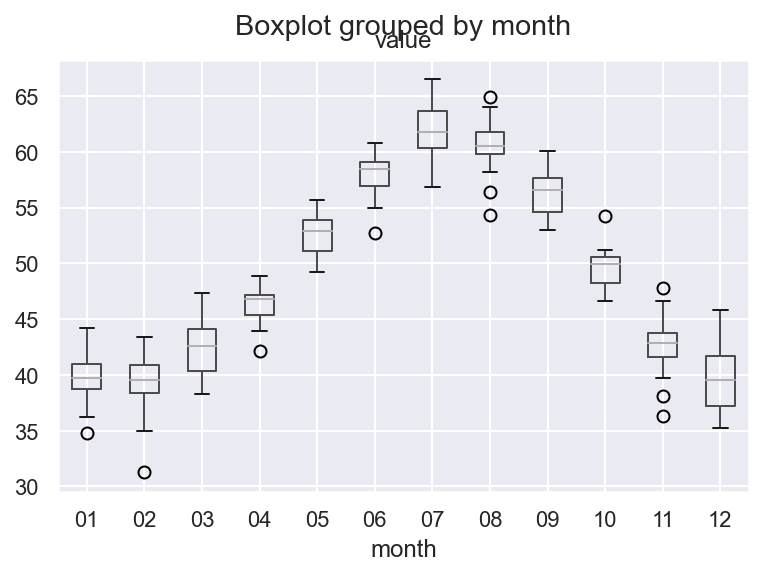

In [142]:
df_nottem.boxplot("value", "month")
plt.show()

회귀분석 모형은 다음과 같다. $x$는 월을 나타내는 독립변수, $\hat{y}$은 월 평균기온을 나타내는 종속변수다.

$$
\hat{y} \sim x
$$

$x$를 풀랭크 방식으로 더미변수화하면 다음과 같은 모형이 된다. 이 식에서 $d_i$는 $i$월을 지시하는 더미변수다.

$$
\hat{y} \sim w_1 d_1 + w_2 d_2 + w_3 d_3 + \cdots + w_{12} d_{12}
$$

더미변수의 값을 대입하면 다음과 같다.

$$
\begin{aligned}
x=1 & \; \rightarrow \; d = (1,0,0,0,\cdots,0) \; \rightarrow \; \hat{y} = w_1 \\ 
x=2 & \; \rightarrow \; d = (0,1,0,0,\cdots,0) \; \rightarrow \; \hat{y} = w_2 \\ 
x=3 & \; \rightarrow \; d = (0,0,1,0,\cdots,0) \; \rightarrow \; \hat{y} = w_3 \\ 
    & \vdots \\
x=12 & \; \rightarrow \; d = (0,0,0,0,\cdots,1) \; \rightarrow \; \hat{y} = w_{12} \\ 
\end{aligned}
$$

따라서 $w_i$는 $i$월의 기온의 표본평균값으로 계산된다.<br><br>

즉 이게 무슨 얘기냐, 월별로 데이터가 모여져서 상수를 이룬다는 것. 
**1월달 데이터만 모아놨는데, y는 상수 라고 말을 해야함. 1월 기온의 대푯값이 되는 것**<br>
$w_1$이라는 하나의 값으로 얘기를 해줘야 한다는 거니깐. <br>
실제로 아래서 보면, 각 달의 평균 값이 계산되어진다. <br>



<pre>
왜 인지 생각을 해볼까? 
지금 쓰고 있는 회귀분석 방법론은 결국 잔차제곱을 최소로 만드는 w vector를 찾아가는 과정.
그 찾는 과정에서, 현재 모델의 경우에는 어떤 한가지 대표값(잔차제곱합이 최소가 되게 해주는)을 찾아서 리턴하게 된다는 것. 
직관적으로도 아마 평균값일 것이고, 실제로도 그렇게 나오더라.
</pre>

statsmodels 패키지의 `OLS` 클래스를 사용하면 다음과 같이 회귀분석을 할 수 있다. 월 데이터가 숫자이므로 연속값으로 인식하지 않도록 `C()` 연산자를 사용하였다.

In [143]:
model = sm.OLS.from_formula("value ~ C(month) + 0", df_nottem)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          2.96e-125
Time:                        01:06:57   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

1월을 기준월로 하는 축소랭크 방식을 사용하면 더미변수는 다음과 같다.

$$
\begin{aligned}
x=1 & \; \rightarrow \; d = (1,0,0,0,\cdots,0) \; \rightarrow \; \hat{y} = w_1 \\ 
x=2 & \; \rightarrow \; d = (1,1,0,0,\cdots,0) \; \rightarrow \; \hat{y} = w_1 + w_2 \\ 
x=3 & \; \rightarrow \; d = (1,0,1,0,\cdots,0) \; \rightarrow \; \hat{y} = w_1 + w_3  \\ 
    & \vdots \\
x=12 & \; \rightarrow \; d = (1,0,0,0,\cdots,1) \\ 
\end{aligned}
$$

포뮬러 문자열에서 ***`+0`을 제외하면 축소랭크 방식을 사용한다.*** 이 때는 1월의 평균 기온을 기준으로 각 월의 평균 기온이 1월보다 얼마나 더 높은지를 나타내는 값이 회귀모형의 계수가 된다.<br>

이렇게 되니깐, $w_2, w_3$가 의미하는 것이, 기준이 되는 1월에 비해서 얼마나 달라지냐를 의미하게 되는 것. 


In [144]:
model = sm.OLS.from_formula("value ~ C(month)", df_nottem)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          2.96e-125
Time:                        01:07:10   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.6950      0.518     76.

P가 P검정의 유의확률을 의미함. p가 0에 가까우면, 귀무가설을 Reject한 것. 여기서의 귀무가설은, ***"Coef값이 0이다"*** 이게 귀무가설. 원래는 0인데, 노이즈가 끼다 보니간, 0이 아닌 값이 나온 것일 뿐이다 라는 것이 귀무가설. 예컨대 이 값이 0.491이라고 나와있으면, coef에 -0.5050이라고 써 있어도 아무 의미가 없다는 뜻. 사실 0이라는 뜻. <br>
그럼 여기서 C(month)[T.02]를 보면, 귀무가설채택한다? **그게 무슨말이냐면, 사실 1월과 2월은 차이가 없다는 뜻.** <br>
풀랭크 방식은 이런 방식의 해석이 안됨. coef가 다들 각각의 평균값이라서 0이라는게 의미가 없음. P-value를 봐도 싹다 reject이 됬음 <br> 위처럼 A랑 B랑 같다 이런것을 체크할 수가 없음.<br><br><br>


조금 더 첨언 하자면, 위 테이블에서 $P>|t|$가 의미하는 것이 'coef는 0이다' 였다면, 실제로 coef가 나온 값이 16이고 이러면 당연히 reject이겠지. 사실 0이였는데 어떻게 16이 나와. 

### 보스턴 집값 데이터의 범주형 변수

보스턴 집값 데이터는 `CHAS`라는 범주형 변수가 있고 이 변수는 0과 1 두 개의 값을 가진다. 

만약 보스턴 집값 데이터에서 상수값 가중치를 가지는 모형을 만들면 축소 랭크 방식으로 더미변수 변환되어 있는 것과 같다. 즉 다음과 같은 두 개의 모형을 각각 회귀분석하는 경우라고 볼 수 있다. 

* `CHAS` = 1 인 경우,
$$ y = (w_0 + w_{\text{CHAS}}) + w_{\text{CRIM}} \text{CRIM} + w_{\text{ZN}} \text{ZN} + \cdots $$

* `CHAS` = 0 인 경우,
$$ y = w_0 + w_{\text{CRIM}} \text{CRIM} + w_{\text{ZN}} \text{ZN} + \cdots $$



In [145]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston = pd.concat([dfX, dfy], axis=1)

model1 = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df_boston)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          6.72e-135
Time:                        01:31:13   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

위 테이블을 보면, reduced rank방식으로 되어 있음. <br>
그럼 이게 무슨 얘기냐, 다른 모든 독립변수(CHAS를 포함한 모든 독립변수)가 0일때의 가격<br>
CHAS 옆에 써있는 coef는? <br>
찰스강 근처에 있으면, ***가격이 2.6867오른다는 뜻***. <br>
즉, 찰스강 근처에 있을 때의 프리미엄이 되는 것.

반대로 보스턴 집값 데이터에서 상수값 가중치를 가지지 않는 모형을 만들면 풀 랭크 방식으로 더미변수 변환되어 있는 것과 같다. 즉 다음과 같은 두 개의 모형을 각각 회귀분석하는 경우라고 볼 수 있다. 이때는 각각의 값이 그냥, 각각 모형에서의 y절편을 의미하지. 

* `CHAS` = 1 인 경우,
$$ y = w_{\text{CHAS=0}}) + w_{\text{CRIM}} \text{CRIM} + w_{\text{ZN}} \text{ZN} + \cdots $$

* `CHAS` = 0 인 경우,
$$ y = w_{\text{CHAS=1}}) \text{CRIM} + w_{\text{ZN}} \text{ZN} + \cdots $$


In [146]:
feature_names = list(boston.feature_names)
feature_names.remove("CHAS") 
feature_names = [name for name in feature_names] + ["C(CHAS)"]
model2 = sm.OLS.from_formula("MEDV ~ 0 + " + "+".join(feature_names), data=df_boston)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          6.72e-135
Time:                        01:31:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(CHAS)[0.0]    36.4595      5.103      7.144   

### 두 개 이상의 범주형 변수가 있는 경우

두개 이상이면 통합축소형 방식

두 개 이상의 범주형 변수가 있는 경우에는 축소형 방식을 사용한다. 이 때 주의할 점은 모든 범주형 범수의 가중치는 기준값 상수항에 더해지는 상수항으로 취급된다. 예들 들어  $x_1$은 A, B 의 두가지 값을 가지고 $x_2$은 X, Y의 두가지 값을 가지고 값을 가지는 경우 상수항과 각 더미변수의 가중치의 의미는 다음과 같아진다.

$$
\begin{aligned}
\hat{y} &= w_0    && + && w_1 x_1                 && + && w_2 x_2                 &+ \cdots  + w_D x_D \\
        &         &&   && \hspace{5pt} \downarrow &&   && \hspace{5pt} \downarrow & \\
\hat{y} &= w_{AX} && + && w_{1B} d_{1B}           && + && w_{2Y} d_{2Y}           &+ \cdots  + w_D x_D \\
\end{aligned}
$$



* $w_{AX} $: 기준값 $x_1=A, x_2=X$인 경우의 상수항
* $w_{1,B}$: 기준값 $x_1=B, x_2=X$인 경우에 추가되는 상수항
* $w_{1,Y}$: 기준값 $x_1=A, x_2=Y$인 경우에 추가되는 상수항
* $w_{1,B} + w_{1,Y}$: 기준값 $x_1=B, x_2=Y$인 경우에 추가되는 상수항


![1_14.png](./materials/1_14.png)

### 범주형 독립변수와 실수 독립변수의 상호작용

지금까지 했던 것 보면, x1이 A가 되든 B가 되든 기울기가 똑같이 y절편만 움직였음<br>
근데 경우에 따라서는, 카테고리가 다를 때, 기울기 자체가 달라질 수 있음. <br> 
가만히 놔둔다고 이런 모델이 만들어 지지 않음. <br> 
상호작용term을 추가를 해줘야함. 당연하지만 미리 아는게 아니고 이것저것 해보고 알게 되는 거야. 카테고리 다르게 기울기 그려보니깐, 눈으로만 봐도 다르고 그런 경우도 많음. <br>
데이터가 그런 특성을 보이는 것 같으면, 두개를 곱한 상을 강제로 넣어야 한다. 

만약 범주형 변수의 값이 달라질 때 상수항만 달라지는 것이 아니라 다른 독립변수들이 미치는 영향도 달라지는 모형을 원한다면 상호작용(interaction)을 쓰면 된다. 예를 들어 범주형 독립변수 $x_1$과 실수 독립변수 $x_2$를 가지는 회귀모형에서 연속값 독립변수 $x_2$가 미치는 영향 즉 가중치가 범주형 독립변수 $x_1$의 값에 따라 달라진다면 범주형 독립변수를 더미변수 $d_1$으로 인코딩하고 연속값 독립변수 $x_2$는 $d_1$과의 상호작용 항 `d_1:x_2` 를 추가하여 사용한다.


이 때 모형은 다음과 같아진다.

$$ 
\begin{aligned}
\hat{y} 
&= w_0 + w_{1} x_1 \cdot w_2 x_2 \\
&= w_0 + (w_{1A}d_A + w_{1B}d_B) \cdot (w_2x_2) \\
&= w_0 + w_{2A} d_A x_2 + w_{2B} d_B  x_2 \\
\end{aligned}
$$

$x_1=A$일 때는 $d_A=1,d_B=0$에서

$$ \hat{y} = w_0 + w_{2A}x_2 $$

$x_1=B$일 때는  $d_A=0,d_B=1$에서

$$ \hat{y} = w_0 + w_{2B}x_2 $$

이므로 $x_1$ 범주값에 따라 $x_2$의 기울기가 달라지는 모형이 된다.

![1_14.png](./materials/1_15.png)

만약 범주형 독립변수도 종속변수에 영향을 미치고 범주형 독립변수와 실수 독립변수의 상호작용도 종속변수에 영향을 미친다면 모형은 다음과 같아진다.

$$ 
\begin{aligned}
\hat{y} 
&= w_{1} x_1 + w_{12} x_1 \cdot w_2 x_2 \\
&= (w_{1A}d_A + w_{1B}d_B) + (w_{1A}d_A + w_{1B}d_B)\cdot (w_2x_2) \\
&= (w_{1A}d_A + w_{1B}d_B) + (w_{2A}d_A + w_{2B}d_B)x_2 \\
&= (w_{1A} + w_{2A} x_2)d_A + (w_{2B} + w_{2B}x_2)d_B \\
\end{aligned}
$$

$x_1=A$일 때는 $d_A=1,d_B=0$에서

$$ \hat{y} =w_{1A} + w_{2A}x_2 $$

$x_1=B$일 때는  $d_A=0,d_B=1$에서

$$ \hat{y} = w_{1B} + w_{2B}x_2 $$

이므로 $x_1$ 범주값에 따라 상수항과 $x_2$의 기울기가 모두 달라지는 모형이 된다.

![1_14.png](./materials/1_16.png)

## 4.5 부분회귀

회귀분석을 해서 W를 알아냈는데, 갑자기 그런 생각이 드는거야<br>
"아 이것도 넣어서 해봤으면 더 좋았을껄"<br>
그래서 걔도 추가해서 회귀분석을 또 돌렸어. <br>
w1을 구해놨고, x2도 생각이 나서, w2도 같이 돌린거야. <br>
***그럼, $w'_1$과 $w_1$가 같을까 다를까?*** <br>
결론적으로 말하면 다르다. <br>
예를 들어, x1이 면적이야. 그거로 써서 회귀분석 했을때는, 평당 가격이 얼마($w_1$)라고 나왔음(집값 예측중).<br>
층수를 추가해서 다시 회귀분석을 돌려보면, 평당 가격이 다르게 나온다는 것($w'_1$).<br>
<br>
**결론적으로 모든 데이터를 다 써보기 전까지는 내가 구한 값은 믿을 수가 없다는 뜻.**


만약 회귀분석을 한 후에 새로운 독립변수를 추가하여 다시 회귀분석을 한다면 그 전에 회귀분석으로 구했던 가중치의 값은 변할까 변하지 않을까? 
예를 들어 $x_1$이라는 독립변수만으로 회귀분석한 결과가 다음과 같다고 하자.

$$ y = w_1 x_1 + e $$

이 때 새로운 독립변수 $x_2$를 추가하여 회귀분석을 하게 되면 이 때 나오는 $x_1$에 대한 가중치 $w'_1$가 원래의 $w_1$과 같을까 다를까?

$$ y = w_1' x_1 + w_2' x_2 + e' $$

답부터 말하자면 

> **일반적으로 $w'_1$의 값은 원래의 $w_1$의 값과 다르다.** 

***즉. 우리가 종속변수에 영향을 미치는 모든 독립변수를 회귀모형에 포함하지 않는 한 모형의 가중치는 항상 편향된(biased) 값이 된다. 이 사실은 다음과 같이 증명할 수 있다.***

독립변수를 $X_1$, $X_2$라는 두 개의 그룹으로 나눈다. 

$$ X = \begin{bmatrix} X_1 & X_2 \end{bmatrix} $$

만약 독립변수 $X_1$만으로 회귀분석을 하면 가중치 벡터는 다음과 같다.

$$ w_1 = (X_1^TX_1)^{-1}X_1^T y $$

여기에 독립변수 $X_2$를 추가한 새로운 선형 회귀모형을 생각해 보자.

$$
y = \hat{y} + e' = 
\begin{bmatrix}
X_1 & X_2
\end{bmatrix}
\begin{bmatrix}
w'_1 \\ w'_2
\end{bmatrix}
+ e'
$$

이 식에서 $w'_1과 w'_2$은 두 독립변수를 모두 사용한 새로운 모형의 가중치 벡터이고 $e'$는 새로운 모형의 잔차 벡터이다. 양변에 $X^T$를 곱하여 직교 방정식을 구하면,

$$
\begin{bmatrix}
X_1^TX_1 & X_1^TX_2 \\
X_2^TX_1 & X_2^TX_2 \\
\end{bmatrix}
\begin{bmatrix}
w'_1 \\ w'_2
\end{bmatrix}
=
\begin{bmatrix}
X_1^Ty \\ X_2^Ty
\end{bmatrix}
$$

부분행렬의 역행렬 공식을 사용하여 이 방정식을 풀면 다음과 같은 공식을 얻을 수 있다.

> 직교방정식의 성질  $𝑋^𝑇𝑒=0$

$$
\begin{aligned}
w'_1 
&= (X_1^TX_1)^{-1}X_1^T(y - X_2 w'_2) \\
&= (X_1^TX_1)^{-1}X_1^Ty - (X_1^TX_1)^{-1}X_1^T X_2 w'_2 \\
\end{aligned}
$$

이 값은 독립변수 $X_1$만으로 회귀분석을 한 결과와 다르다.  

$$ w'_1 = w_1 - (X_1^TX_1)^{-1}X_1^T X_2 w'_2 $$


따라서 

> **새로운 독립변수 그룹 $X_2$를 추가해서 다시 회귀분석을 한다면 기존 가중치 벡터의 값이 달라진다.**

단, 다음과 같은 경우에는 두가지 회귀분석의 결과가 같을 수 있다.

(1) $w'_2=0$. 즉 $X_2$와 $y$의 상관관계가 없는 경우

(2) $X_1^T X_2 = 0$. 즉 독립변수 $X_1$과 독립변수 $X_2$가 직교하는 경우. 독립변수 $X_1$과 독립변수 $X_2$이 서로 상관관계가 없으면 직교할 가능성이 높다. $X_1^T X_2 = 0$ 이게 지금 상관곗수임. 상관계수가 0인 경우를 의미. 

<br>
즉, $X_2$가 y를 예측하는데 영양가가 없는 경우, 혹은 $X_1$가 상관관계가 전혀 없는 경우, 이 두 경우는 추가적으로 feature를 넣고 다시 선형회귀 돌려도, $w_1$이 달라지지 않는다. 그 외에는 식으로 증명했듯 달라진다.

***아래 정리는 바로 위에서 여기 한거 조금 더 복잡한 방식으로 정리해 놓은 것.***

### 프리슈-워-로벨 정리

![1_18.jpeg](./materials/1_18.jpeg)

위의 상황 직관적으로는 이해하기 어렵지 않음. 면적 뺀 나머지 가지고 집값을 예측을 해보는데, 예측이 안되는 부분이 있으면 그것은 면적이 빠져있어서겠지. <br>
그리고, 이제 면적 뺀 나머지가 면적에 영향을 미쳐서 그 면적이 다시 집값에 영향을 미친 부분을 찾아보는거야(이중으로 영향 미친 부분이 있을까봐). <br>
그랬는데 예측안된 잔차는 순수하게 면적만 움직인 부분이지. 순수한 면적의 움직임으로 순수한 집값의 움직임을 예측 하겠다는 의미. 

프리슈-워-로벨(Frisch–Waugh–Lovell) 정리 혹은 FWL 정리는 위 결과를 다른 방식으로 표현한 것이다.

(1) 특정한 독립변수 그룹 $X_1$로 종속변수 $y$를 선형 회귀분석하여 잔차 $y^{\ast}$를 구한다.

(2) $X_1$로 다른 독립변수 $x_2$를 선형 회귀분석하여 나온 잔차 $x_2^{\ast}$를 구한다. 

(3) $y^{\ast}$를 종속변수로하고 $x_2^{\ast}$를 독립변수로 하여 선형 회귀분석하여 구한 가중치는 $X_1$과  $x_2$를 모두 사용하여 $y$를 선형 회귀분석하였을 때 $x_2$에 대한 가중치와 같다.

증명은 다음과 같다. 모든 독립변수를 사용한 회귀분석 모형에서 $X_1$에 대한 가중치 벡터 $w_1$는 원래 다음 관계에서 구해야 한다.

$$ 
y = 
\begin{bmatrix}
X_1 & x_2
\end{bmatrix}
\begin{bmatrix}
w_1 \\ w_2
\end{bmatrix}
+ e
$$

이 때 직교 방정식은 다음과 같다.

$$
\begin{bmatrix}
X_1^TX_1 & X_1^Tx_2 \\
x_2^TX_1 & x_2^Tx_2 \\
\end{bmatrix}
\begin{bmatrix}
w_1 \\ w_2
\end{bmatrix}
=
\begin{bmatrix}
X_1^Ty \\ x_2^Ty
\end{bmatrix}
$$

이 식의 아랫 부분만 쓰면 다음과 같다.

$$
x_2^TX_1w_1 + x_2^Tx_2w_2 = x_2^Ty
$$


여기에 앞에서 구했던 $w_1$ 값을 대입하면,

$$
w_1 = (X_1^TX_1)^{-1}X_1^Ty - (X_1^TX_1)^{-1}X_1^T x_2 w_2 \\
$$

이 식을 정리하면

$$
x_2^TX_1(X_1^TX_1)^{-1}X_1^Ty - x_2^TX_1(X_1^TX_1)^{-1}X_1^T x_2 w_2 + x_2^Tx_2w_2 = x_2^Ty
$$


$$
x_2^T(I - X_1(X_1^TX_1)^{-1}X_1^T) x_2 w_2  = x_2^T (I - X_1(X_1^TX_1)^{-1}X_1^T)y
$$

여기에 $X_1$으로 선형 회귀분석하였을 때의 잔차 행렬 $M_1$

$$
M_1 = I - X_1(X_1^TX_1)^{-1}X_1^T
$$

을 적용하면,

$$
x_2^T (M_1 x_2) w_2  = x_2^T (M_1 y)
$$

이다. 잔차 행렬의 성질을 이용하면,

$$
(M_1 x_2)^T (M_1 x_2) w_2  = (M_1x_2)^T (M_1 y)
$$

가 된다. 

$M_1 x_2$는 $X_1$으로 $x_2$를 회귀분석한 잔차 벡터이고 $M_1 y$는 $X_1$으로 $y$를 회귀분석한 잔차 벡터이므로 

$$
x_2^{\ast ^T} x_2^{\ast} w_2 = x_2^{\ast T} y^{\ast}
$$


따라서 $x_2^{\ast}$를 독립변수, $y^{\ast}$를 종속변수로 선형 회귀분석한 결과와 같아진다.

### 부분회귀 플롯

위에 있는 프리슈-워-로벨 정리를 통해서, 구한 두 잔차 사이에서 scatter plot을 그리는 것. 

독립변수의 갯수가 많을 때 **특정한 하나의 독립변수의 영향력을 시각화하는 방법이 부분회귀 플롯(Partial Regression Plot)**이다. Added Variable Plot이라고도 한다.

부분회귀 플롯을 그리기 위해서는 3번의 선형 회귀분석을 해야 한다.

1. 특정한 독립변수 $x_2$를 제외한 나머지 독립변수 $X_1$들로 종속변수 $y$를 선형 회귀분석하여 잔차 $y^{\ast}$를 구한다.
2. 특정한 독립변수 $x_2$를 제외한 나머지 독립변수 $X_1$들로 특정한 독립변수 $x_2$를 선형 회귀분석하여 잔차 $x_2^{\ast}$를 구한다.
3. 잔차 $x_2^{\ast}$를 독립변수로, 잔차 $y^{\ast}$를 종속변수로 하여 선형 회귀분석한다.

이렇게 구한 $x_2^{\ast}$, $y^{\ast}$의 스캐터 플롯과 회귀분석 결과를 나타낸 것이 부분회귀 플롯이다.

보스턴 데이터를 예로 들어보자.

In [192]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()

단순하게 AGE라는 독립변수와 MEDV 종속변수간의 관계를 살펴보면 마치 ***음의 상관관계***가 있는 것처럼 보인다.<br>
근데 모든게 다 고려되기 전에는 알 수가 없다는 것. 믿으면 안된다는 거야. 

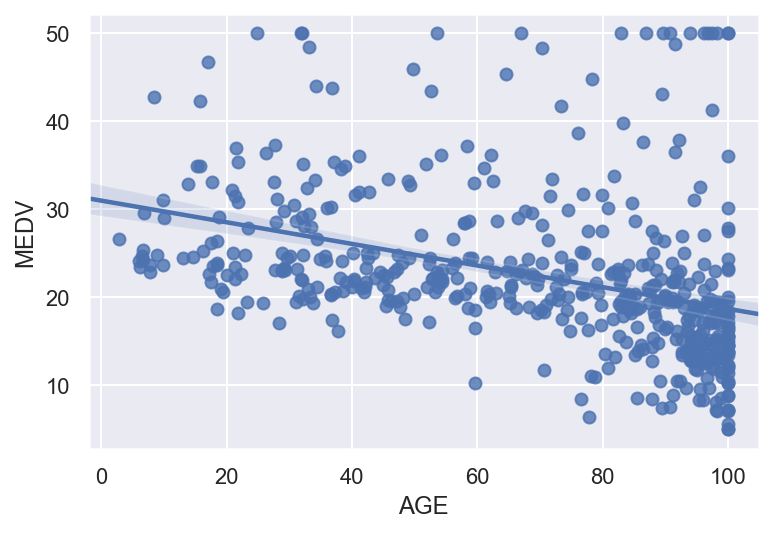

In [194]:
sns.regplot(x="AGE", y="MEDV", data=df)
plt.show()

statsmodels 패키지의 `sm.graphics.plot_partregress` 명령을 쓰면 부분회귀 플롯을 그릴 수 있다. 이 때 다른 변수의 이름을 모두 지정해 주어야 한다. 

```
plot_partregress(endog, exog_i, exog_others, data=None, obs_labels=True, ret_coords=False)
```

* `endog`: 종속변수 문자열
* `exog_i`: 분석 대상이 되는 독립변수 문자열
* `exog_others`: 나머지 독립변수 문자열의 리스트
* `data`: 모든 데이터가 있는 데이터프레임
* `obs_labels`: 데이터 라벨링 여부
* `ret_coords`: 잔차 데이터 반환 여부


부분회귀 플롯으로 살펴보면 AGE 변수와 종속변수는 상관관계가 없다는 것을 알 수 있다.

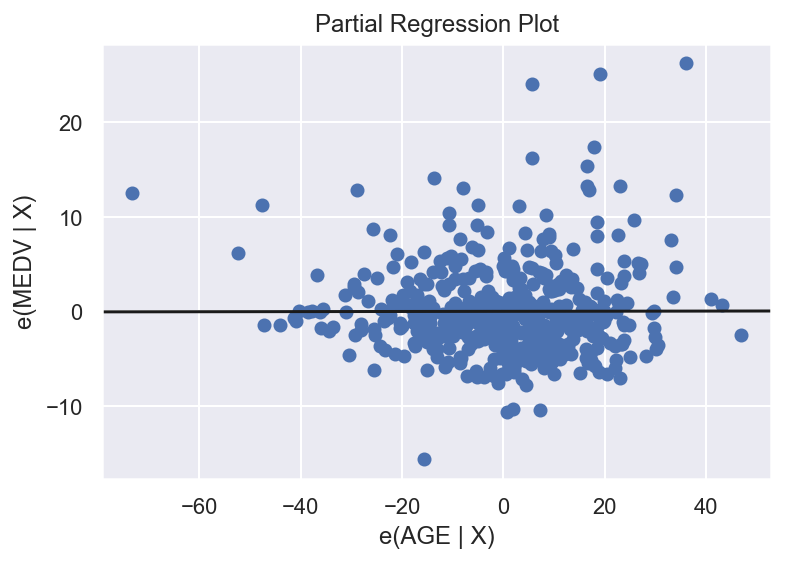

In [195]:
others = list(set(df.columns).difference(set(["MEDV", "AGE"])))
p, resids = sm.graphics.plot_partregress(
    "MEDV", "AGE", others, data=df, obs_labels=False, ret_coords=True
)
plt.show()

컬럼 앞에 e붙어 있어. 이게 무엇이냐면, <br>
x축은 다른 모든 변수들로 age를 예측하고 남은 잔차 - ***순수한 age만의 움직임***<br>
y축은 age를 제외한 모든 변수들로 집값(MEDV)를 예측하고 남은 잔차 의미. <br><br><br>


그럼 다시 위에꺼를 해석해 보자면, 위에서는 왜 음의 상관관계인 것 처럼 나왔을까? <br>
뭔가 다른 변수가 age에 영향을 미침과 동시에 집값에도 영향을 동시에 미친 것. <br>
즉, 어떤 변수가 커지니깐, 집값은 커지고 age는 작아지는 관계(영향)이 있었던 것. <br>
그래서, age만으로는 실제로는 영향을 안미치는데, 우리 눈에 보기에는 age와 medv가 음의 상관관계를 가지는 것처럼 우리 눈에 보인 것.<br>

명확하게 딱 한 변수와 타겟변수의 관계를 보고 싶으면, 위나 아래처럼 sm.parttregress plot을 봐야 한다는 것. <br><br>

여기서의 결론이 뭘까? 
상관관계 구한다고, X랑 Y딱 놓고 상관관계 구하면 안된다는 거야. ***항상 부분회귀 플롯을 그려놓고 상관관계를 찾아야 한다.***

부분회귀 플롯에서 가로축의 값은 독립변수 자체의 값이 아니라 어떤 독립변수에서 다른 독립변수의 영향을 제거한 일종의 "순수한 독립변수 성분"을 뜻한다.

`sm.graphics.plot_partregress_grid` 명령을 쓰면 전체 데이터에 대해 한번에 부분회귀 플롯을 그릴 수 있다.

```
plot_partregress_grid(result, fig)
```

* `result`: 회귀분석 결과 객체
* `fig`: `plt.figure` 객체

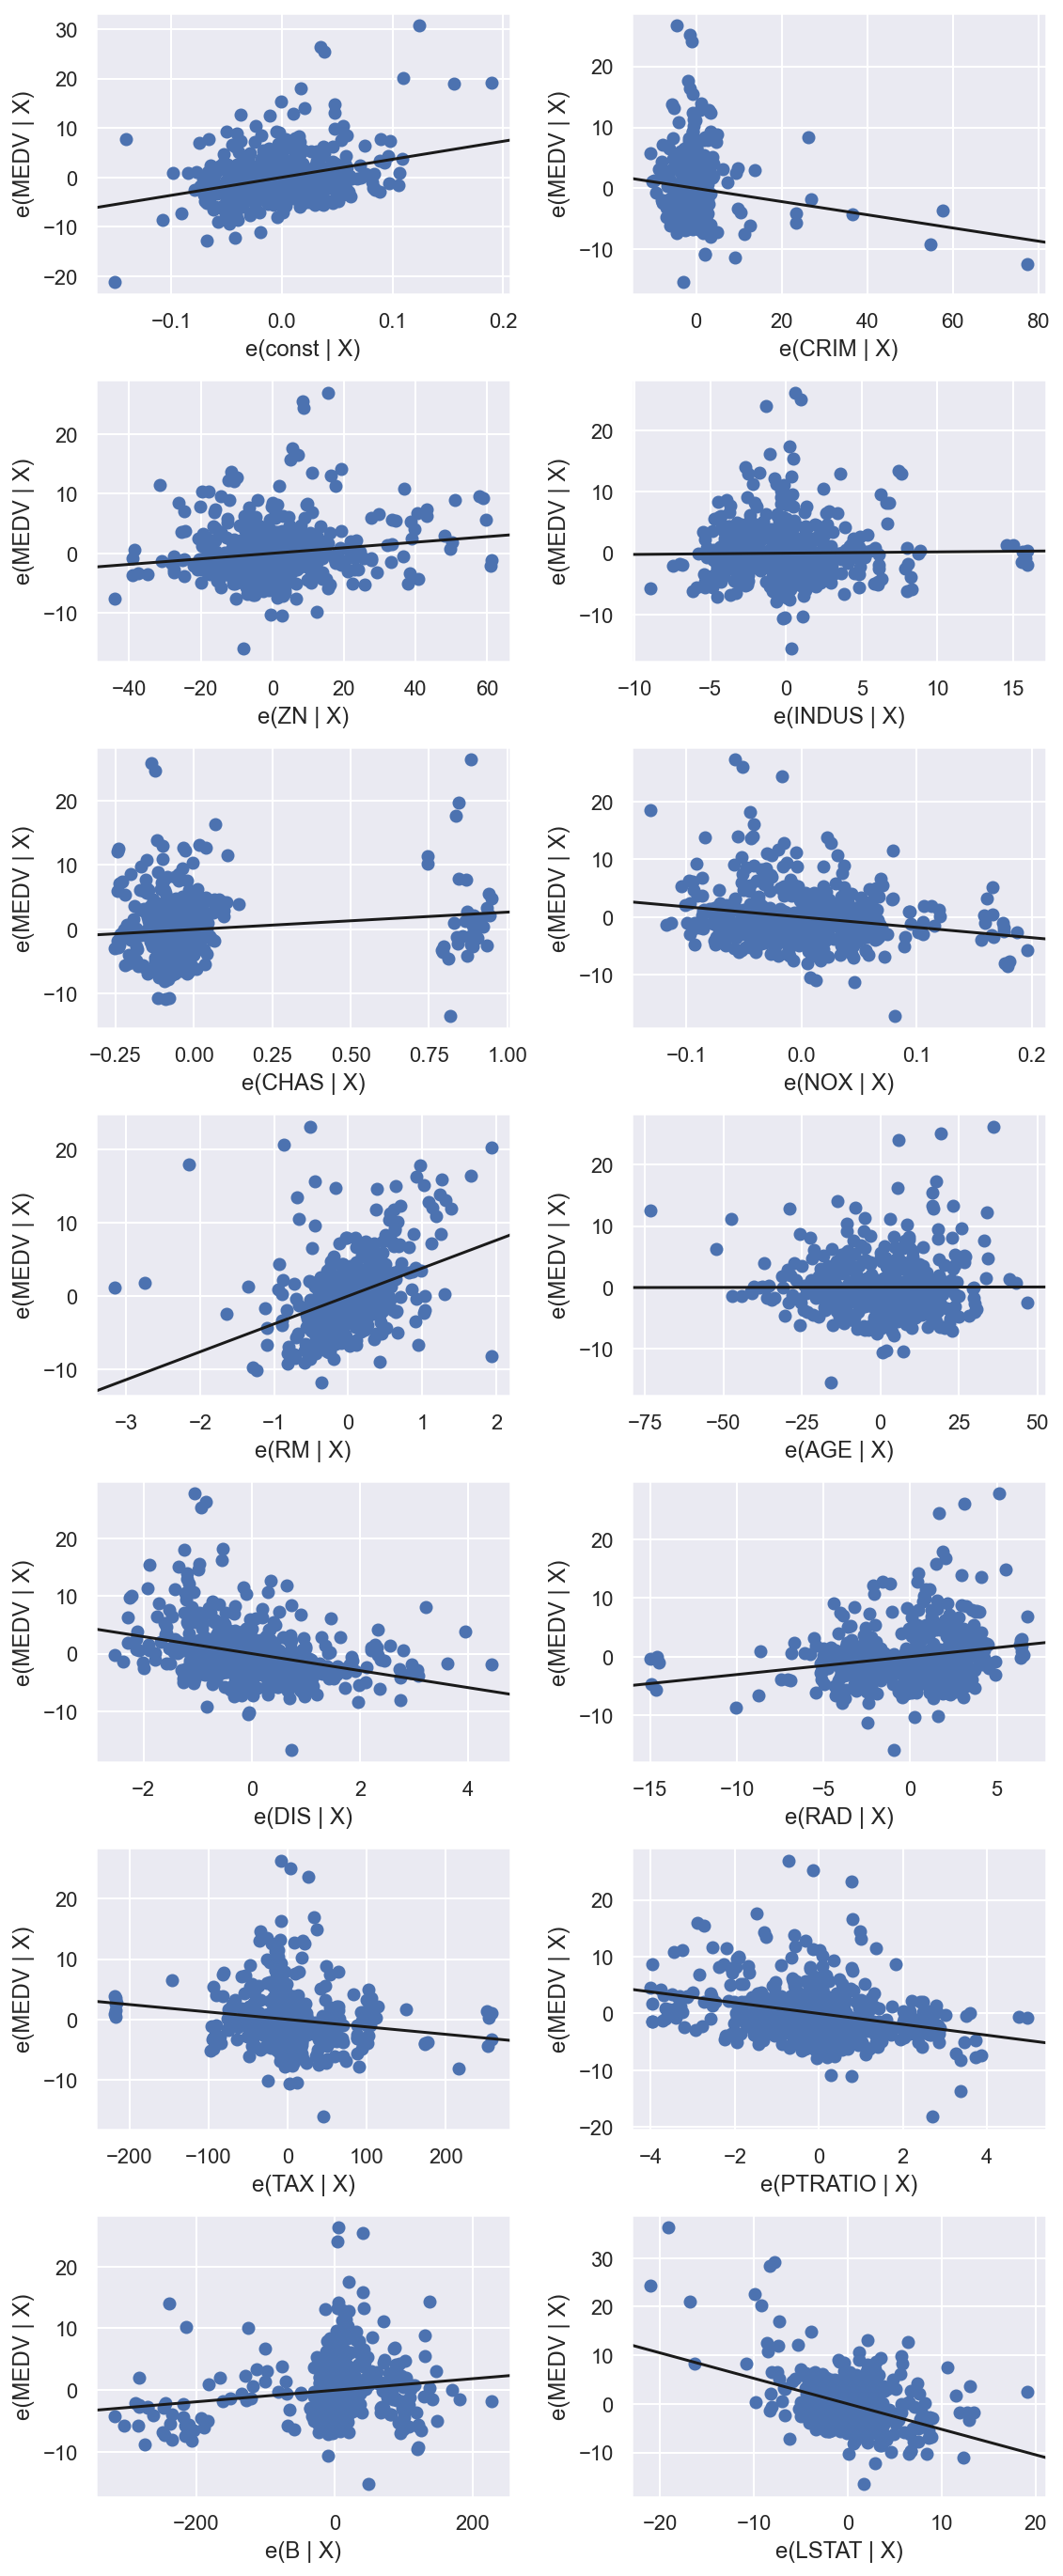

In [196]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

### CCPR 플롯

얘는 약간 꼼수같은 느낌으로 구하는 것. 프리슈-워-로벨로 구하는 것이 아니라, 일단 한번에 다 넣고 구함. <br>
plotting을 할 때, $x_1$을 가로축으로 놓고, y를 넣을 때, $w_1x_1$에 $e$를 넣어서 그냥 흔들리게 보여줌. <br>
사실 부분회귀 플롯이랑 그래프 모양을 놓고 보면 비슷하게 나온다. <br>
다만, CCPR에서는 x축이 AGE, LSTAT 그 자체. 

CCPR(Component-Component plus Residual) 플롯도 부분회귀 플롯과 마찬가지로 특정한 하나의 변수의 영향을 살펴보기 위한 것이다.

다음과 같은 회귀 모형이 있다고 가정하자.

$$ y = \hat{y} + e = w_1 x_1 +  w_2 x_2 +  \cdots + w_i x_i +  \cdots +  w_K x_K + e $$

CCPR 플롯은 이 성분 중에서 

* $x_i$를 가로축으로
* $w_i x_i + e$을 세로축으로

그린 스캐터 플롯이다.

statsmodels 패키지의 `sm.graphics.plot_ccpr` 명령으로 CCPR 플롯을 그릴 수 있다.

```
plot_ccpr(result, exog_idx)
```

* `result`: 회귀분석 결과 객체
* `exog_idx`: 분석 대상이 되는 독립변수 문자열

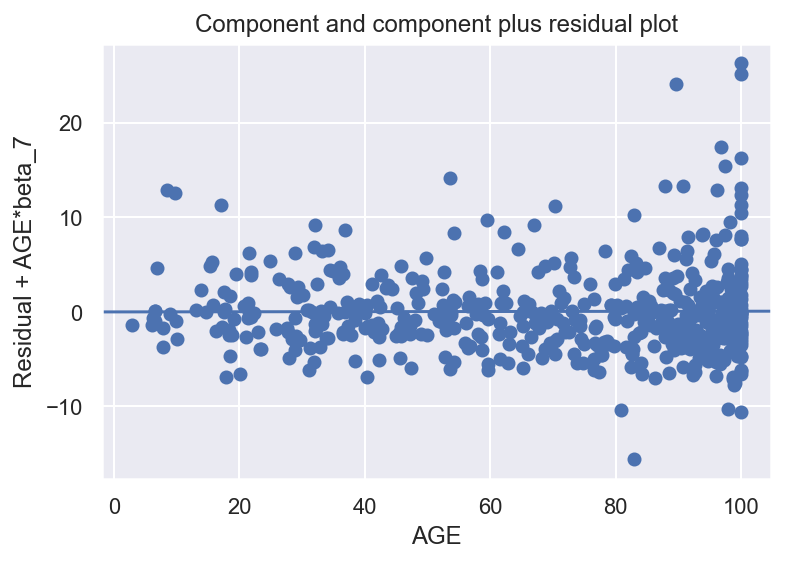

In [197]:
sm.graphics.plot_ccpr(result_boston, "AGE")
plt.show()

CCPR 플롯에서는 부분회귀 플롯과 달리 독립변수가 원래의 값 그대로 나타난다.

마찬가지로 `sm.graphics.plot_ccpr_grid` 명령을 쓰면 전체 데이터에 대해 한번에 CCPR 플롯을 그릴 수 있다.

`plot_ccpr_grid` 명령은 모든 독립변수에 대해 CCPR 플롯을 그려준다.

```
plot_ccpr_grid(result, fig)
```

* `result`: 회귀분석 결과 객체
* `fig`: `plt.figure` 객체

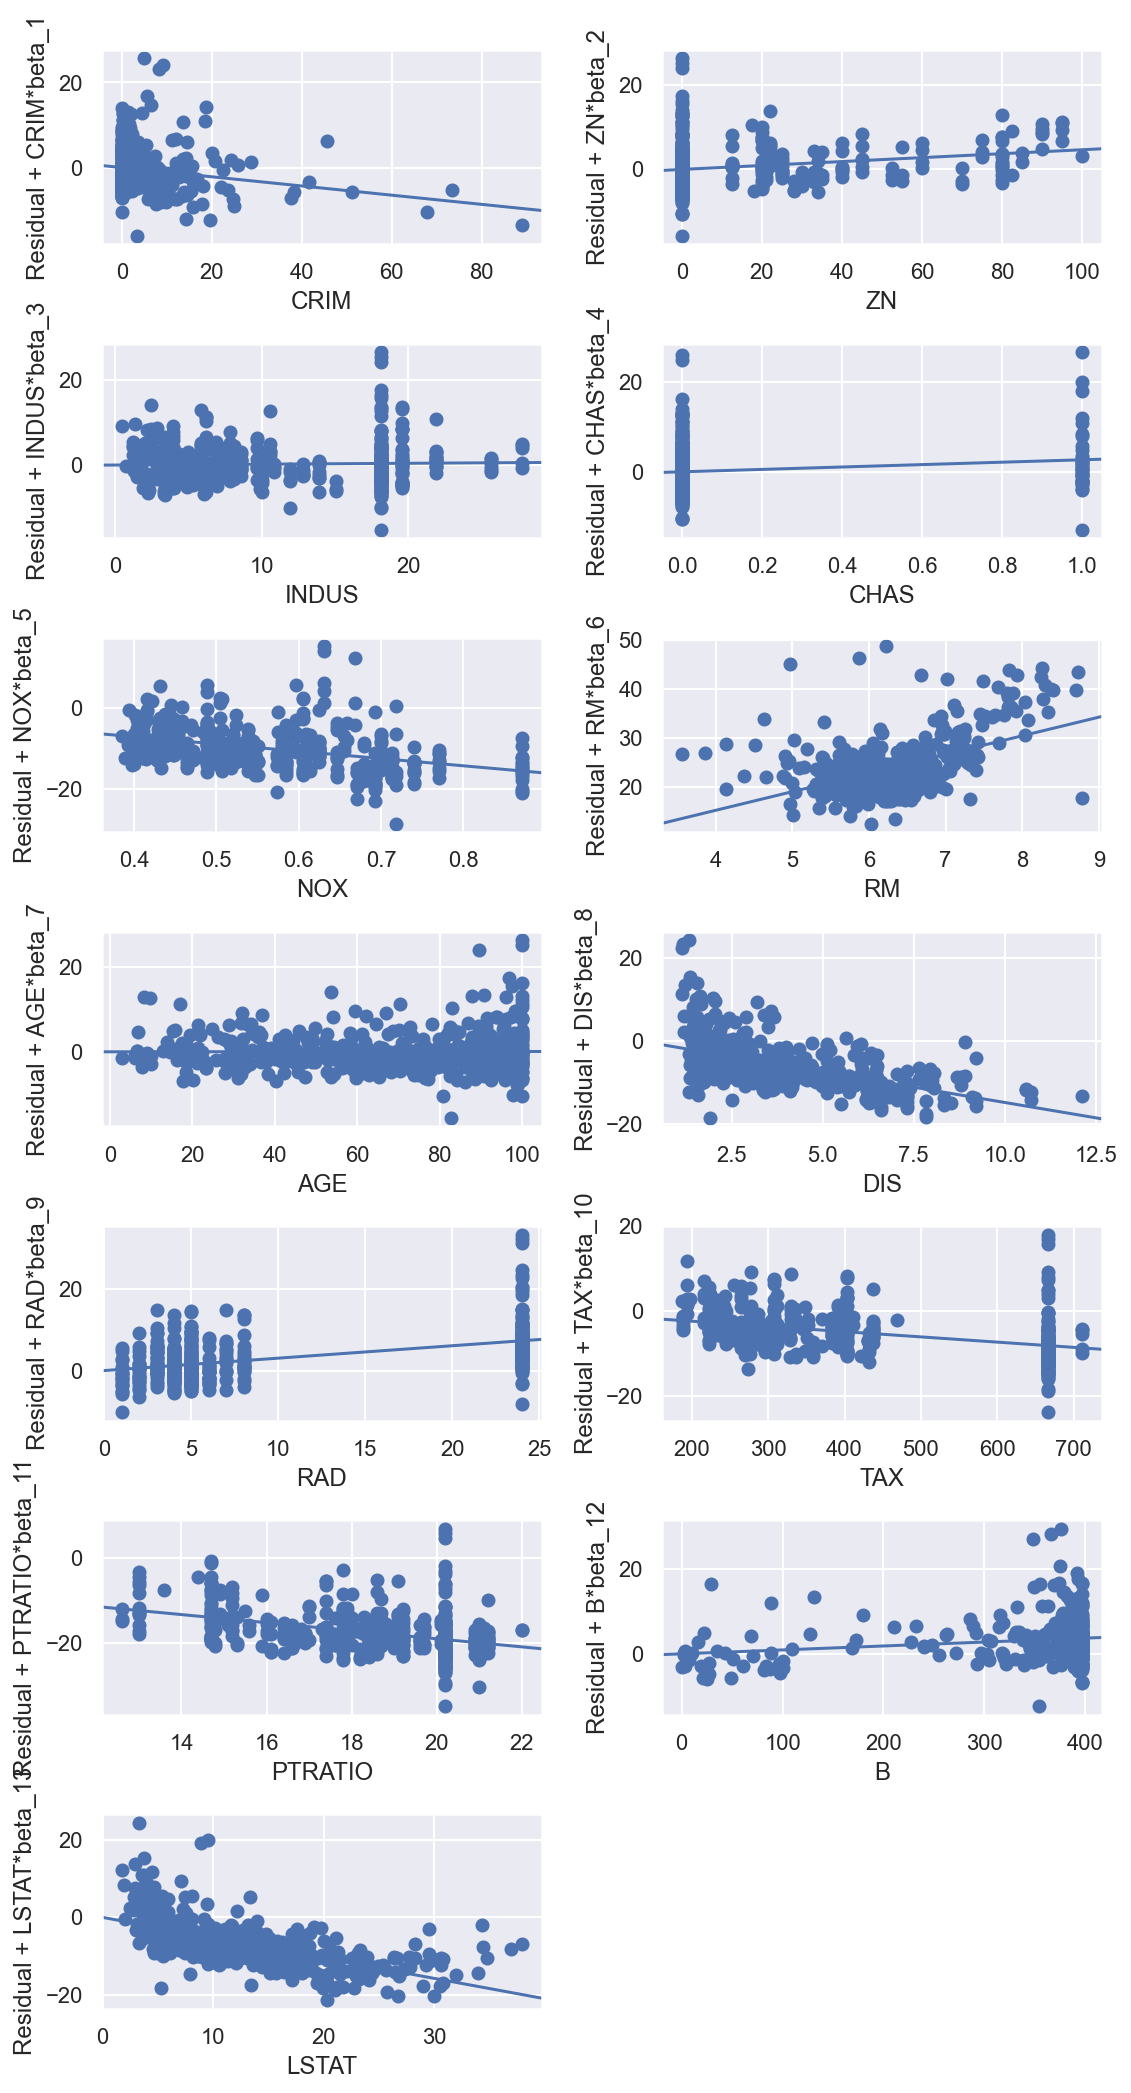

In [198]:
fig = plt.figure(figsize=(8, 15))
sm.graphics.plot_ccpr_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

***이 명령이 실무에서 많이 쓰는 명령어***<br>
특정 X가 미치는 영향을 종합적으로 판단할 수 있게 된다. <br>
아래 예시는 AGE가 미치는 영향을 종합적으로 판단하는 것. <br>


`plot_regress_exog` 명령은 부분회귀 플롯과 CCPR을 같이 보여준다.

```
plot_regress_exog(result, exog_idx)
```

* `result`: 회귀분석 결과 객체
* `exog_idx`: 분석 대상이 되는 독립변수 문자열

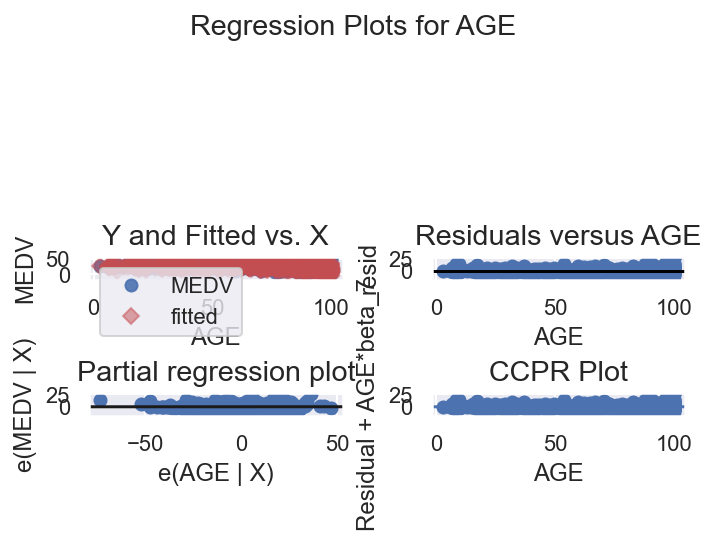

In [199]:
fig = sm.graphics.plot_regress_exog(result_boston, "AGE")
plt.tight_layout(pad=4, h_pad=0.5, w_pad=0.5)
plt.show()

<pre>
왼쪽 아래 : 부분회귀
오른쪽 아래 : CCPR PLOT
왼쪽 위 : 그냥 원래 plot. AGE $ Y의 플롯, 파란색 점은 실제 Y값. 빨간색은 우리가 그 X_10을 가지고 다른 변수들도 다 합쳐셔 예측한 값. y_hat 
오른쪽위 : AGE와 잔차 부분만 나타낸 것. 잔차 플롯의 모양을 보고, 모델을 어떻게 바꿀지 예측할 수 있는 경우가 가끔 있다. 가끔씩 해당 변수와 잔차간의 상관관계가 나타나는 경우가 있다(선형으로는 안나옴. 선형으로 나올 수 있는 것은 이미 다 빠져있는 상태. 선형모델로 다 뺀 상태). 그런데, 변수와 모델 사이의 비선형 상관관계가 있을 때는, 여기 잔차에서 보이는 경우가 있음. 가장 대표적으로 U가 비슷하게 휘어져서 나타나는 경우가 있다. 
</pre>

참고로, $x$대신 $x^2$을 넣는 등 X에 대한 비선형 회귀번석도 존재함. 그런데, 이것은 그냥 $x$대신 $x^2$라는 데이터를 구해온 것 처럼 취급하는 것일 뿐. W에 대해서는 그대로 선형이야. 우리는 이 W를 가지고 말하는 것이기 때문에, 선형회귀분석이라고 말하는 것이고, 실제로 우리가 할수있는 것은 선형회귀 뿐이다. 

## 5.1 확률론적 선형 회귀모형

앞에서 확인했던 것과 같이 사실 우리가 회귀분석을 하면 정답이 안나온다. 정확한 답은 안나온다. 항상 오차가 생기지 선으로 표현한 거니깐 <br>
근데 사실 오차도 몰라. 그러면 결론이 뭐냐면, "우린 아무것도 모른다" 이렇게 되는 것. <br>
만약 ceof -1.080이 나왔는데, 오차가 +-0.01정도이면, -관계인 것은 변하지 않음. 그런데 만약 오차가 +-2라면?  <br>
~3.08 ~ +0.92 사이를 왔다갔다 함. 정 반대의 결론이 나올 수가 있음. 심지어는 이 오차범위 사이에 0도 껴있음. 0이였으면, 영향이 없다임. <br>
그럼 우리가 대체 여기서 아는게 뭐야. 아는게 없어. 심지어 오차를 알아야 이정도지, 오차 자체도 몰라. <br>
***우리한테 필요한건, 대체 이 coef라고 구한게 오차가 어느정도인지를 알아야함. 그게 아니면 아무것도 모르는 거야.***<br>
<br>

OLS(Ordinary Least Square) 방법을 사용하면 데이터에 대한 확률론적인 가정이 없어도 최적의 가중치를 계산할 수 있었다. 그러나 계산한 가중치가 어느 정도의 신뢰도를 가지는지 확인할 수 있는 방법이 없다. 

예를 들어 보스턴 집값의 선형 회귀모형에서 OLS로 계산한 범죄율에 대한 가중치는 약 $-0.1080$이었다. 만약 이 값이 정확한 값이라면 집값은 범죄율에 반비례한다는 결론을 내릴 수 있다. 하지만 $-0.1080$은 표본에서 계산된 추정치일 뿐이며 추정 오차가 있을 수 있다. 만약 추정 오차의 크기가 $0.0001$ 수준이라면 실제 가중치는 $-0.1080 \pm 0.0001$ 즉, $-0.1081 \sim -0.1079$ 정도이고 집값이 범죄율에 반비례한다는 결론은 바뀌지 않을 것이다. 하지만 만약 추정 오차의 크기가 $0.2$ 수준이라면 실제 가중치는 $-0.3081 \sim 0.0920$ 정도의 범위가 된다. 다시 말해 진짜 가중치는 0이 될 수도 있고 양수가 될 수 있다. 만약 가중치가 0이라면 범죄율과 집값은 아무런 상관 관계가 없다는 결론이 나온다. 만약 가중치가 양수이면 집값은 범죄율에 정비례한다는 결론이 나올 수도 있다. 즉 가중치의 오차 범위 혹은 신뢰 구간을 계산할 수 없다면 OLS 결과로부터 실질적인 결론을 이끌어내기 어렵다.


### 부트스트래핑

$w$가 왜 달라지냐? 데이터가 조금밖에 없어서 달라지는 것. 정말 데이터가 어마어마하게 많았으면 비교적 정확한 값이 나왔겠지. <br>
데이터를 일부만 샘플링해서 나온 것이라 오차가 생겼다면, *또 다른 데이터를 넣어보자.* <br>
그러면 $w$가 어떻게 나올까? <br>
근데 데이터는 지금 가진게 전부야. 그래서 resampling을 해보자. <br>
<br>
전체 데이터 중에 일부만 뽑아서 다시 $w$를 구해보자. 근데 일부만 뽑는 방법도 굉장히 많지. 수백번 수천번 일부만 다시 뽑을 수 있지. <br>
resampling을 여러번 다시 해보면서 $w$를 다시 구해본다. <br>
그게 바로 **bootstraping** 방법

부트스트래핑(bootstrapping)은 회귀분석에 사용한 표본 데이터가 달라질 때 회귀분석의 결과는 어느 정도 영향을 받는지를 알기 위한 방법이다. 

OLS로 구한 가중치의 추정값은 표본 데이터에 따라 달라진다. 만약 여러가지 다른 표본 데이터 집합이 있다면 이 데이터들을 넣어보면서 가중치가 어느 정도 달라지는지에 대한 감을 얻을 수 있을 것이다. 그러나 현실적으로는 추가적인 데이터를 얻기 어렵기 때문에 부트스트래핑 방법에서는 기존의 데이터를 재표본화(re-sampling)하여 여러가지 다양한 표본 데이터 집합을 만드는 방법을 사용한다. 재표본화는 기존의 $N$개의 데이터에서 다시 $N$개의 데이터를 선택하되 중복 선택도 가능하게 한다(unordered resampling with replacement). 

직접 부트스트래핑을 실시해 보자. 다음과 같은 선형 회귀 모형을 따르는 100개의 가상 데이터를 생성한다. 모형에 사용된 모수는 상수항이 $w_0=0$,  기울기가 $w_1=42.3855$이다.

$$ y = w_0 + w_1 x + \epsilon $$

In [200]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20,
                              coef=True, random_state=0)
coef

array(42.38550486)

이 표본 데이터를 기반으로 회귀분석을 실시한다.

In [202]:
dfX0 = pd.DataFrame(X0, columns=["X1"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["y"])

model = sm.OLS(dfy, dfX)
result = model.fit()

추정된 가중치값은 `params` 속성에 저장되어 있다. 상수항의 추정치가 $\hat{w}_0=-1.628364$, 기울기의 추정치가 $\hat{w}_1=42.853356$로 실제 모수와 다르다는 것을 알 수 있다.

In [203]:
result.params

const    -1.628364
X1       42.853356
dtype: float64

정답은 $const = 0$, $x1 = 42.3855$ <br>
정답이 아닌 값 나왔음. 

다음으로 이 데이터를 재표본화하여 다른 데이터 집합을 만들고 이 데이터를 기반으로 다시 회귀분석을 한다. 여기에서는 이러한 회귀분석을 1,000번 반복한다. 그 결과로써 1,000개의 다른 가중치 추정값이 나오게 된다.

데이터 계속 리샘플링하면서 1000번의 회귀분석을 하는 과정. 

In [219]:
%%time
N = 1000
params_w0 = np.zeros(N)
params_w1 = np.zeros(N)
for i in range(N):
    idx = np.random.choice(len(dfy), len(dfy), replace=True)
    dfX2 = dfX.iloc[idx, :]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfX2).fit()
    params_w0[i] = r.params.const
    params_w1[i] = r.params.X1

CPU times: user 5.57 s, sys: 200 ms, total: 5.77 s
Wall time: 1.72 s


전체 가중치 추정값 집합을 히스토그램으로 나타내면 다음과 같다.

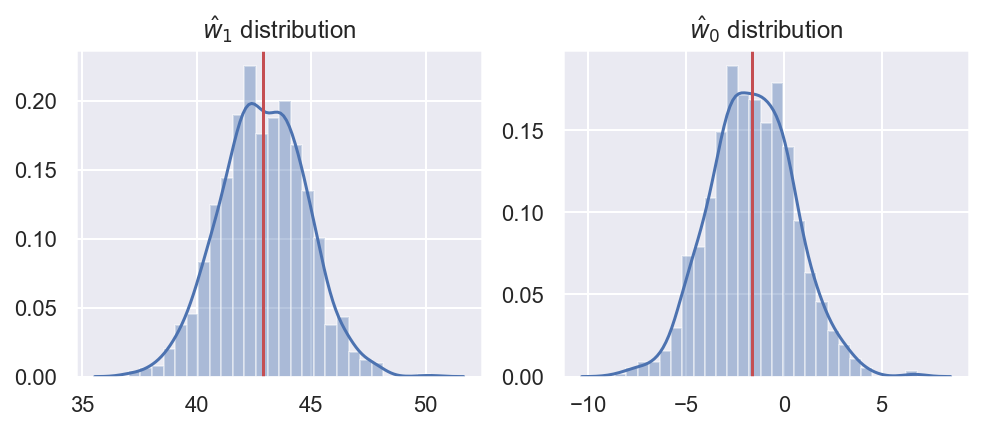

In [220]:
plt.figure(figsize=(8, 3))

ax1 = plt.subplot(121)
sns.distplot(params_w1, ax=ax1)
plt.axvline(params_w1.mean(), c='r')
plt.title("$\hat{w}_1$ distribution")

ax2 = plt.subplot(122)
sns.distplot(params_w0, ax=ax2)
plt.axvline(params_w0.mean(), c='r')
plt.title("$\hat{w}_0$ distribution")
plt.show()

지금 위 분포에서 빨간선은 데이터 전체 다 썼을 때. 

추정치 분포의 평균과 분산은 다음과 같다. 기울기의 추정치 분포는 평균이 $42.92$, 표준편차가 $1.92$이다. 대부분의 데이터가 $42.92 \pm 3.84$ ($\bar{x} \pm 2s$) 사이에 있다. 따라서 오차가 큰 경우에도 0 혹은 음수가 될 가능성은 적다.

In [206]:
params_w1.mean(), params_w1.std()

(42.88280898731358, 1.892035921440595)

그런데 상수항의 추정치 분포는 평균이 $-1.67$, 표준편차가 $2.16$이다. 대부분의 데이터가 $-1.67 \pm 4.32 \; (-5.99 \sim 2.65)$ 사이에 있기 때문에 0일 수도 있고 혹은 음수일 수도 있다. 실제 이런 경우가 문제인 것. 

In [207]:
params_w0.mean(), params_w0.std()

(-1.652243933614457, 2.134296507845485)

***근데 부트스트래핑 방법의 문제는 회귀분석을 1000번 하고 앉아 있는거라서 시간이 오래걸림. 그래도 뭐 대략적인 오차의 범위는 알 수 있지***

이 결과를 statsmodels의 `summary` 메서드로 출력한 보고서와 비교해보면 추정치의 표준편차와 비슷한 값이 `std err`이라는 이름으로 표시되어 있고 $\bar{x} \pm 2s$로 추정한 구간과 비슷한 값이 `[0.025      0.975]` 열 아래에 표시되어 있다. 예를 들어 상수항 추정치는 `std err`가 2.163 이고 `[0.025      0.975]`열 값이 $-5.920 \sim 2.663$이다.

In [208]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.21e-36
Time:                        17:13:15   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

하지만 이 보고서의 값은 부트스트래핑을 사용하여 구한 값이 아니라 확률론적 선형 회귀모형을 사용한 것이다. 확률론적 선형 회귀모형을 쓰면 부트스트래핑처럼 많은 계산을 하지 않아도 빠르고 안정적으로 가중치 추정값의 오차를 구할 수 있다.

우리는 부트스트래핑해서 1000번 계산하고 있었는데, 얘는 어떻게 한거지? <br>
**어떻게 했는데 이렇게 빨리, std err,를 구하고 $+-std err*2$ 해서 이 표에다가 써줬을까?** <br>
얘가 바로 확률론적 선형회귀 모형을 쓴 것.

### 확률론적 선형 회귀모형

확률론적 선형회귀모형을 사용하면, 부트스트래핑처럼 많은 계산을 안해도, 빠르게 w값에 대한 오차범위를 계산할 수가 있다. <br>

확률론적 선형 회귀모형에서는 데이터가 확률 변수로부터 생성된 표본이라고 가정한다. 구체적인 가정은 다음과 같다. 지금까지는 OLS하는 동안, 확률얘기는 아예 나온 적이 없음. 확률과 관련이 없는 계산이였음. 지금부터 확률모형이 가미가 되는 것. 

#### (1) 선형 정규 분포 가정

선형 회귀분석의 기본 가정은 종속 변수 $y$가 독립 변수 $x$의 선형 조합으로 결정되는 기댓값과 고정된 분산 $\sigma^2$을 가지는 가우시안 정규 분포라는 것이다. 즉 y는 중심위치가 X때문에 바뀌는 정규분포에서 나온 값이다. 

$$ y \sim \mathcal{N}(w^Tx, \sigma^2) $$

y의 확률 밀도 함수는 다음처럼 쓸 수 있다. 이 식에서 모수 벡터 $\theta=(w, \sigma^2)$이다.

$$ p(y \mid x, \theta) = \mathcal{N}(y \mid w^Tx, \sigma^2 ) $$

이 관계식을 잡음(disturbance) $ \epsilon$ 개념으로 변환하면 더 간단하게 표현할 수 있다.

$$ \epsilon = y - w^Tx $$


$$ p(\epsilon \mid \theta) = \mathcal{N}(0, \sigma^2 ) $$ <br>


y에서 중심위치를 뺀것을 잡음이라고 표현한다. 이 잡음이라는 것이 0을 중심으로 한 정규분포를 따르게 된다는 가정 <br>
이게, make_regression할 때, 엡실론이였던 것.  

여기에서 주의할 점은

> **x, y 중 그 어느 것도 그 자체로 정규 분포일 필요는 없다(x는 심지어 확률변수도 아니다. 주어진 상수값)**

는 것이다. 

$y$도 $x$에 대해 **조건부로 정규 분포**를 이루는 것이지 $y$ 자체가 무조건부로 정규분포는 아니다.

y가 정규분포라고 했던 것은, X에 따라서 변하는 정규분포라고 말했던 것. <br>
$y-w^Tx$로 계산되는 disturbance가 정규분포라는 것이지, x, y자체의 주변확률분포가 정규분포일 필요는 없다. 

![1_19.jpeg](./materials/1_19.jpeg)

#### (2) 외생성(Exogeneity) 가정

잡음 $\epsilon$의 기댓값은 독립 변수 $x$의 크기에 상관없이 항상 0이라고 가정한다. 이를 외생성(Exogeneity) 가정이라고 한다.

$$ \text{E}[\epsilon \mid x] = 0$$ 

외생성 가정으로부터와 잡음 $\epsilon$의 무조건부 기댓값이 0임을 증명할 수 있다. 

$$ \text{E}[\epsilon] = \text{E}[\text{E}[\epsilon \mid x]] = 0$$

역은 성립하지 않는다. 즉 조건부 기댓값이 0이면 기댓값은 0이지만 기댓값이 0이라고 조건부 기댓값이 0이 되지는 않는다.

그리고 같은 가정으로부터 잡음 $\epsilon$와 독립 변수 $x$가 상관 관계가 없다는 것도 증명할 수 있다.

$$ \text{E}[\epsilon x] = \text{E}[\text{E}[\epsilon x \mid x]] = \text{E}[x \text{E}[\epsilon\mid x]] = 0$$

#### (3) 조건부 독립 가정

$i$번째 표본의 잡음 $\epsilon_i$와 $j$번째 표본의 잡음 $\epsilon_j$의 공분산 값이 $x$와 상관없이 항상 0이라고 가정한다.

$$ \text{Cov}[\epsilon_i, \epsilon_j \mid x] = 0 \;\; (i,j=1,2,\ldots,N) $$ 

이는 $i$번째 표본의 잡음 $\epsilon_i$와 $j$번째 표본의 잡음 $\epsilon_j$는 서로 독립이라는 가정과 같다.

이 가정과 위의 다른 가정들로부터 다음을 증명할 수 있다.

$$ \text{E}[\epsilon_i \epsilon_j] = 0 \;\; (i,j=1,2,\ldots,N) $$

잡음 벡터 $\epsilon$의 공분산 행렬이 대각행렬이 되어야 한다는 조건과 같다. (비대각 성분이 모두 0이어야 한다.)

$$\text{Cov}[\epsilon] = \text{E}[\epsilon^{} \epsilon^T] = \text{diagonal matrix} $$

$\epsilon$은 모든 disturbance다 모아놓은 거니깐 벡터. 그 벡터에 대한 Covariance는 대각행렬이 된다. <br>
Why? 서로 상관관계 없다고 가정했으니깐. 

#### (4) 등분산성 가정

$i$번째 표본의 잡음 $\epsilon_i$와 $j$번째 표본의 잡음 $\epsilon_j$의 분산 값이 표본과 상관없이 항상 같다고 가정한다.

잡음 벡터 $\epsilon$의 공분산 행렬이 항등행렬 형태가 되어야 한다는 조건과 같다.

$$\text{Cov}[\epsilon] = \text{E}[\epsilon^{} \epsilon^T] = \sigma^2I $$

즉, 대각행렬이면서 대각선이 모두 똑같은 값을 갖는 행렬이 된다는 것. <br>
모든 $\epsilon$의 분산값이 다 똑같다는 가정이네. 

사실 첫번째 가정이 가장 중요하다. 나머지 가정들은 모델이 복잡해지면 없어지기도 하는 가정이다.

### 최대 가능도 방법을 사용한 선형 회귀분석

우리가 w를 구할때, maximum likelihood estimation을 쓰면. <br>
***우리가 가진 모델에서 이런 현재 데이터가 나올 수 있는 확률을 높이면서 구하는 것.*** <br>

확률론적 선형 회귀모형의 가정과 최대 가능도 방법(Maximum Likelihood Estimation)을 사용하여 가중치 벡터 $w$의 값을 구해보자.

가능도는 다음과 같다.<br>
$x_1$부터 $x_n$까지 있을 때, $y_1$부터 $y_n$까지 나올 확률. <br>
각각 독립 가정해서, 곱으로 표현해놨음. 


$$
\begin{eqnarray}
p(y_{1:N} \,\big|\, x_{1:N}, \theta)
&=& \prod_{i=1}^N \mathcal{N}(y_i \,\big|\, w^T x_i , \sigma^2) \\
&=& \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(y_i-w^T x_i)^2}{2\sigma^2} \right\}  \\
\end{eqnarray}
$$

계산을 쉽게하기 위해 Log를 적용하여 로그 가능도(log-likelihood)를 구한다.

$$
\begin{eqnarray}
\text{LL}  
&=& \log p(y_{1:N} \,\big|\, x_{1:N}, \theta) \\
&=& \log \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(y_i-w^T x_i)^2}{2\sigma^2} \right\}  \\
&=& -\dfrac{1}{2\sigma^2} \sum_{i=1}^N (y_i-w^T x_i)^2 - \dfrac{N}{2} \log{2\pi}{\sigma^2}  \\
\end{eqnarray}
$$



이를 행렬로 표시하면 다음과 같다.


$$
\text{LL}  =  -C_1 (y - Xw)^T(y-Xw) - C_0 = -C_1(w^TX^TXw -2 y^TXw + y^Ty) - C_0
$$

$$
C_1 =  -\dfrac{1}{2\sigma^2}
$$

$$
C_0 =  \dfrac{N}{2} \log{2\pi}{\sigma^2} 
$$

그리고 이재, LL이 가장 커지게 하는 w값을 찾으면 됨. w로 미분하면 되지. 

최적화하면 OLS와 동일한 결과를 얻을 수 있다.


$$
\dfrac{d}{dw} \text{LL} = -C_1 \left( 2X^TX \hat{w} - 2X^Ty \right) = 0
$$

$$
\hat{w} = (X^TX)^{-1}X^T y
$$

최대 가능도 방법에서도 OLS의 직교 방정식과 같은 직교 방정식을 얻을 수 있다.

$$ X^TX \hat{w} - X^Ty = 0 $$

$$ X^T(X \hat{w} - y) = X^T(\hat{y} - y) = X^Te = 0 $$


그냥 OLS로 할때랑 최종적으로 수식이 똑같고, 직교방정식까지도 똑같음. <br>
즉, OLS로 구하나, 확률론적 방법써서 Maximum Likelihood 방법으로 구하나, 결국 똑같다는 것이 결론. 

다만, OLS와 확률론적 방법은 관점이 조금 다름. <br>
OLS는 뭐 자연의 W가 있고, 그런거 모르고 그냥 e가 최소가 나오게 하는 W를 그대로 역행렬로 구한 것. <br>
확률론적 방법 같은경우는 여러가지 전제가 들어가있음. 

근데 잘 보면, $w$대신 $\hat{w}$으로 써있음. <br>
실제 w라는 값은 분명히 존재하는데, 우리가 구한 값은 그 정답하고는 다른 값이 나온다. <br>
OLS에서는 처음부터 정답이라는 것은 존재하지 않았고, 정답 없이 잔차제곱합을 가장 줄이는 $w$값을 찾았을 뿐. <br>
지금 확률론적 모형에서는 w가 존재하고, 가능한 한 w랑 비슷하게 되는 값을 찾은 것. 근데 원래 $w$랑 똑같은 값은 안나온다.  

![1_20.jpeg](./materials/1_20.jpeg)

## 5.2 회귀분석의 기하학

### 회귀 벡터공간

선형 회귀분석으로 예측한 값 $\hat{y}$는 $X$의 각 열 $c_1, \cdots, c_M$의 선형조합으로 표현된다. 

$$ 
\begin{aligned}
\hat{y} 
&= Xw \\
&= \begin{bmatrix} c_1 & \cdots & c_M \end{bmatrix} \begin{bmatrix} w_1 \\ \vdots \\ w_M \end{bmatrix} \\
&= w_1 c_1 + \cdots + w_M c_M 
\end{aligned}
$$
<br>
지금 잘 보면, c1, c2, 이런애들은 쫙다 선형독립이야. <br>
선형 독립이 아니면, 분산행렬이 역행렬이 존재하지 않는 현상이 발생한다고 했음. <br>
서로 다 독립이면 기저벡터라고도 볼 수 있고<br>
그 기저벡터의 모든 조합을 통해 만들 수 있는 애들을 묶어서 벡터공간이라고 했었음. <br>
그 공간 안에서 $\hat{y}$도 존재함. <br>
그 $\hat{y}$을 최대한 $y$에 비슷하게 만들어야 함(y라는 것은 꼭 해당 벡터공간 안에 있다는 보장은 없지). 
그럼 $y$에서 공간으로 직교해서 내린 곳으로 가야겠지. 잔차벡터는 벡터공간에 직교해야지. 
<br>


모든 열이 선형독립이면 예측값 $\hat{y}$는 $X$의 각 열 $c_1, \cdots, c_M$을 기저벡터(basis vector)로 하는 벡터공간(vector space)위에 존재한다는 것을 알 수 있다.

실제 종속변수 데이터 $y$와 예측값 $\hat{y}$의 차이가 잔차 벡터 $e$이다. 따라서 잔차 벡터 $e$의 크기를 가장 작게 만드는 최적의 예측값 $\hat{y}$는 벡터공간내에 존재하면서 $y$와 가장 가까운 벡터이다. 이 때 잔차 벡터 $e$는 벡터 공간에 직교한다. 따라서 예측값 벡터 $\hat{y}$는 $y$를 $X$의 각 열 $c_1, \cdots, c_M$을 기저벡터로 하는 벡터공간에 투영(projection)한 벡터이고 잔차 벡터 $e$는 투영하고 남은 직교 벡터이다.

![1_21.png](./materials/1_21.png)

### 잔차행렬과 투영행렬

벡터 $a$에서 다른 벡터 $b$를 변형하는 과정은 변형행렬(transforma matrix) $T$를 곱하는 연산으로 나타낼 수 있다. 

$$ b = Ta $$


종속값 벡터 $y$를 잔차 벡터 $e$로 변형하는 변환 행렬 $M$를 정의하자. 이 행렬을 **잔차행렬(residual matrix)**이라고 한다. 위에 그림에서, y라는 실제 벡터를 벡터공간에 직교하는 잔차벡터로 바꿔주는 행렬을 M이라고 놓겠다는 뜻. 정의하는 것. 

$$ e = My $$

종속값 벡터 $y$를 예측값 벡터 $\hat{y}$로 변형하는 변환 행렬 $H$를 정의하자.. 이 행렬을 **투영행렬(projection matrix)**이라고 한다. 바깥의 y를 y hat으로 만드는 행렬은 H라고 정의해보자. 

$$ \hat{y} = Hy $$


잔차행렬은 다음과 같이 구한다.

$$
\begin{aligned}
e 
&= y - \hat{y} \\
&= y - Xw \\
&= y - X(X^TX)^{-1}X^Ty \\
&= (I - X(X^TX)^{-1}X^T)y \\
&= My \\
\end{aligned}
$$

투영행렬은 다음과 같이 구한다.

$$
\begin{aligned}
\hat{y} 
&= y - e \\
&= y - My \\
&= (I - M)y \\
&= X(X^TX)^{-1}X^T y \\
&= Hy \\
\end{aligned}
$$

따라서 $M$, $H$는 각각 다음과 같다.

$$ H = X(X^TX)^{-1}X^T $$

$$ M = I - X(X^TX)^{-1}X^T $$

투영 행렬은 y로부터 $\hat{}$기호가 붙은 $\hat{y}$를 계산한다고 해서 **햇(hat) 행렬** 또는 **영향도 행렬(influence matrix)**이라고 부르기도 한다. 영향도 행렬이라는 명칭의 의미는 아웃라이어 분석에서 다시 다룬다.

잔차 행렬과 투영 행렬은 다음과 같은 성질이 있다.

(1) 대칭행렬이다.

$$ M^T = M $$

$$ H^T = H $$

(2) 곱해도 자기 자신이 되는 행렬이다. 이러한 행렬을 **멱등(idempotent)행렬**이라고 한다. 멱등행렬은 몇번을 곱해도 자기 자신이 된다.

$$ M^2 = M $$

$$ H^2 = H $$

(3) $M$과 $H$는 서로 직교한다.

$$ MH = HM = 0 $$

(4) $M$은 $X$와 직교한다.

$$ MX = 0 $$

(5) $X$에 $H$를 곱해도 변하지 않는다.

$$ HX = X $$

위 성질은 다음과 같이 증명한다.

(1) 대칭행렬의 증명

$$
\begin{aligned}
M^T 
&= (I - X(X^TX)^{-1}X^T)^T \\
&= I - X(X^TX)^{-T}X^T \\
&= I - X((X^TX)^T)^{-1}X^T \\
&= I - X(X^TX)^{-1}X^T \\
&= M
\end{aligned}
$$

$$
\begin{aligned}
H^T 
&= (X(X^TX)^{-1}X^T)^T \\
&= X((X^TX)^T)^{-1}X^T \\
&= X(X^TX)^{-1}X^T \\
&= H
\end{aligned}
$$

(2) 멱등성 증명

$$
\begin{aligned}
M^2 
&= (I - X(X^TX)^{-1}X^T)(I - X(X^TX)^{-1}X^T) \\
&= I - 2X(X^TX)^{-T}X^T + X(X^TX)^{-1}X^TX(X^TX)^{-1}X^T\\
&= I - X((X^TX)^T)^{-1}X^T \\
&= M
\end{aligned}
$$

$$
\begin{aligned}
H^2 
&= (X(X^TX)^{-1}X^T)(X(X^TX)^{-1}X^T) \\
&= X(X^TX)^{-1}(X^TX)(X^TX)^{-1}X^T \\
&= X(X^TX)^{-1}X^T \\
&= H
\end{aligned}
$$

(3) $M$과 $H$의 직교 증명

$$
\begin{aligned}
MH 
&= (I - X(X^TX)^{-1}X^T)X(X^TX)^{-1}X^T \\
&= X(X^TX)^{-T}X^T - X(X^TX)^{-1}X^TX(X^TX)^{-1}X^T\\
&= X(X^TX)^{-T}X^T - X(X^TX)^{-1}X^T\\
&= 0
\end{aligned}
$$

(4) $M$과 $X$의 직교 증명

$$
\begin{aligned}
MX
&= (I - X(X^TX)^{-1}X^T)X \\
&= X - X(X^TX)^{-1}X^TX \\
&= X - X\\
&= 0
\end{aligned}
$$

(5) $H$과 $X$의 곱에 대한 증명

$$
\begin{aligned}
HX
&= (X(X^TX)^{-1}X^T)X \\
&= X(X^TX)^{-1}X^TX \\
&= X
\end{aligned}
$$

위 성질들을 이용하면 $y$ 벡터의 제곱합은 잔차 벡터 $e$의 제곱합과 추정치 벡터 $\hat{y}$의 제곱합의 합이라는 것을 알 수 있다.

$$ y = \hat{y} + e = Hy + My = (H + M)y $$

$$
\begin{aligned}
y^Ty 
&= ((H + M)y)^T((H + M)y) \\
&= y^T (H + M)^T (H + M)y \\
&= y^T (H + M) (H + M)y \\
&= y^T (H^2 + MH + HM + M^2)y \\
&= y^T (H + M) y \\
&= y^T H y + y^T M y \\
&= y^T H^2 y + y^T M^2 y \\
&= y^T H^T H y + y^T M^T M y \\
&= (Hy)^T (Hy) + (My)^T (My) \\
&= \hat{y}^T \hat{y} + e^T e \\
\end{aligned}
$$

이 관계식은 나중에 분산 분석(ANOVA)에 사용된다.

### 잔차의 분포

잔차와 disturbance는 다르다. <br>
그런데, disturbance는 정규분포를 따른다. <br>
disturbance가 정규분포 따르면, 잔차도 정규분포 따른다는 것을 증명해보자. 

이미 존재하는 w라는 것과 우리가 구한 $\hat{w}$은 다르다. <br>
그리고 $\epsilon$ 이라는 것($w^Tx+\epsilon$ disturbunce)과 잔차값(residual, $e$)은 다른 것. <br>
epsilon은 우리가 구한 모형과 실제와의 차이 $y - w^Tx$<br>
residual은 $y - \hat{y}$

확률론적 선형 회귀모형에 따르면 회귀분석에서 생기는 **잔차 $e = y - \hat{w}^Tx$ 도 정규 분포를 따른다**. 다음과 같이 증명할 수 있다.

확률론적 선형 회귀모형의 잡음 $\epsilon$와 잔차 $e$는 다음과 같은 관계를 가진다.

$$  \hat{y} = X\hat{w} = X (X^TX)^{-1}X^T y = Hy $$

이 행렬 $H$은 **Hat 행렬** 혹은 **프로젝션(projection) 행렬** 또는 **영향도(influence) 행렬**이라고 부르는 대칭 행렬이다.

Hat 행렬을 이용하면 잔차는 다음처럼 표현된다.

$$ e = y - \hat{y}= y - Hy = (I - H) y = My $$

이 행렬 $M$은 **잔차(residual) 행렬**이라고 부른다. 

확률적 선형 회귀 모형의 가정을 적용하면,

$$ e = My = M (Xw + \epsilon) = MXw + M\epsilon $$

그런데(앞에서 증명한, M행렬의 성질)

$$
MX = 0
$$

에서

$$ e =  M\epsilon $$

즉, **잔차 $e$는 잡음 $\epsilon$의 선형 변환(linear transform)**이다. 정규 분포의 선형 변환은 마찬가지로 정규 분포이므로 잔차도 정규 분포를 다른다.<br>
정규분포를 선형조합하면 그 결과도 항상 정규분포

![1_25.jpeg](./materials/1_25.jpeg)

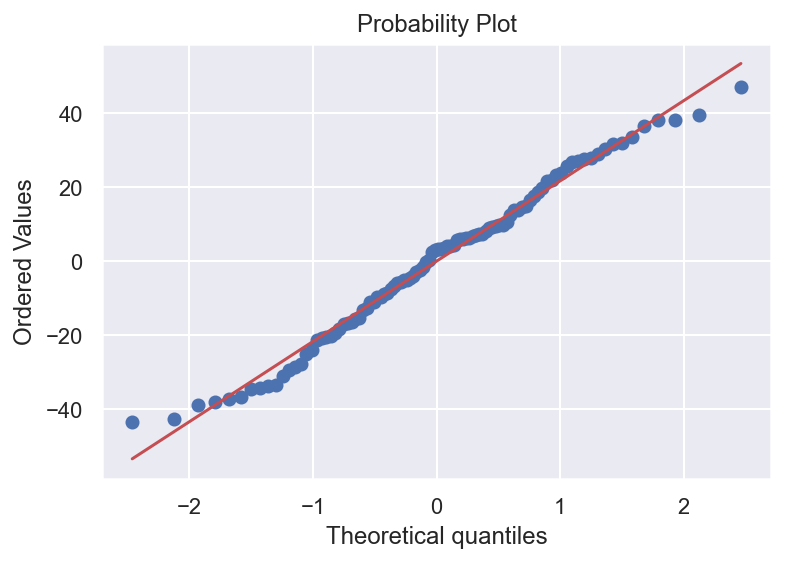

In [221]:
#result.resid에 잔차값들이 들어가 있다. 그걸로 QQ plot그려본 것 
sp.stats.probplot(result.resid, plot=plt)
plt.show()

잔차의 정규성은 다음과 같이 정규성 검정을 통해 살펴볼 수도 있다.

In [222]:
# 옴니버스 검정, Omnibus Normality Test
# 귀무가설 : 정규분포이다. 
test = sm.stats.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  3.523
P-value     :  0.172


In [223]:
# 자크 베라 검정(Jarque-Bera Test)
# 귀무가설 정규분포이다. 
test = sm.stats.jarque_bera(result.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test):
    print("%-12s: %6.3f" % xi)

Jarque-Bera :  2.059
P-value     :  0.357
Skew        : -0.073
Kurtosis    :  2.312


2번 외생성 가정에서, 입실론은 x와 상관없이 항상 기댓값이 0이 된다고 했음. <br>
그런데, 입실론에 M을 곱하면 잔차가 나옴. 잔차도 기댓값이 0이 된다. 

또한 오차의 기댓값이 $x$와 상관없이 0이므로 **잔차의 기댓값도 $x$와 상관없이 0**이어야 한다. 

$$ \text{E}[e | x ] = 0 $$

다음은 $x$값이 달라짐에 따라 잔차의 분포가 어떻게 바뀌는 지를 살펴보기 위한 것이다. $x$값이 달라져도 분포의 형태가 크게 바뀌지 않음을 알 수 있다.

![1_23.jpeg](./materials/1_23.jpeg)

아래 분포가 바로 
<pre>
부분회귀 부분에서, 
fig = sm.graphics.plot_regress_exog(result_boston, "AGE")
plt.tight_layout(pad=4, h_pad=0.5, w_pad=0.5)
plt.show()

</pre>
이 명령어 중에 오른쪽 위에 있던 그래프. <br>
가로축 X, 세로축 residual

그런데 이게 무슨 말일까? <br>
$$ \text{E}[e \mid x] = 0$$ 
x와 상관없이 잔차의 기댓값이 0이다? 


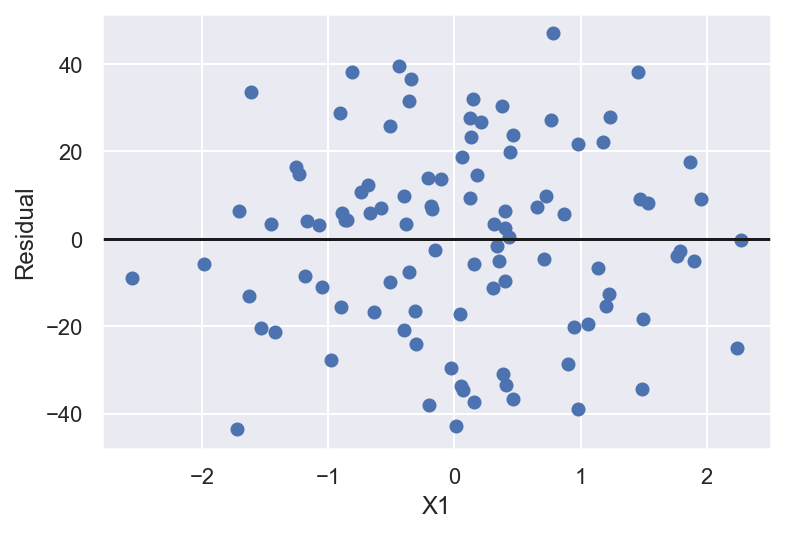

In [212]:
plt.plot(X0, result.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()

다음은 $x$가 $e$에 미치는 영향을 살피기 위해 $0 < x < 1$인 구간과 $1 < x < 2$인 구간으로 나누어 $e$ 분포의 모양을 살펴본 것이다. 둘 다 기댓값이 0에 가깝고 분산의 크기가 비슷함을 알 수 있다.

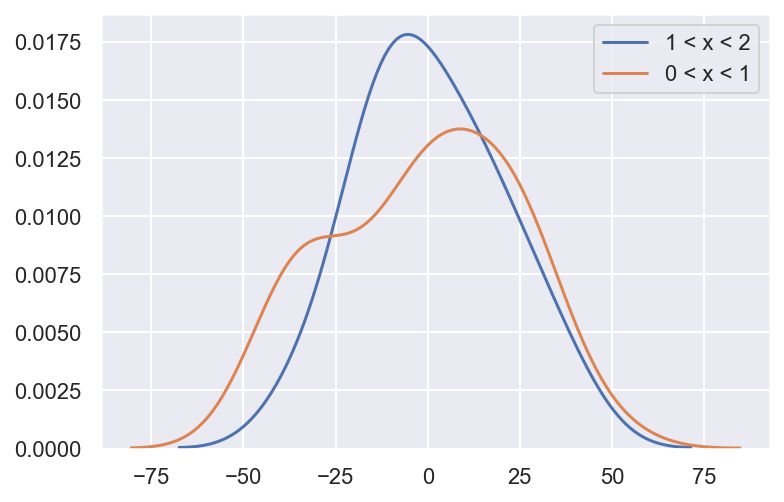

In [213]:
sns.kdeplot(result.resid[((1 < X0) & (X0 < 2)).flatten()], label="1 < x < 2")
sns.kdeplot(result.resid[((0 < X0) & (X0 < 1)).flatten()], label="0 < x < 1")
plt.legend()
plt.show()

### 회귀 계수의 표준 오차

우리가 확률적 선형회귀모형을 왜 쓴댔지? 역행렬 방식으로 해놓고 w의 오차를 몰랐잖아. <br>
아래 식에서 결론이 나온거야.
$$  
\begin{eqnarray}
\hat{w} 
&=& (X^TX)^{-1} X^T y \\
&=& (X^TX)^{-1} X^T (X w + \epsilon) \\
&=& w + (X^TX)^{-1} X^T \epsilon \\
\end{eqnarray}
$$

$(X^TX)^{-1} X^T \epsilon$오차가 이만큼 있다는거야. 

가중치의 예측치 $\hat{w}$ 도 정규 분포 확률 변수인 $\epsilon$의 선형 변환이므로 정규 분포를 따른다.<br>
아래 식을 통해 알 수 있는 것은, 진짜 w는 우리가 구한 $\hat{w}$에다가 그 뒤 term만큼의 오차가 더해진다는 사실. 

$$  
\begin{eqnarray}
\hat{w} 
&=& (X^TX)^{-1} X^T y \\
&=& (X^TX)^{-1} X^T (X w + \epsilon) \\
&=& w + (X^TX)^{-1} X^T \epsilon \\
\end{eqnarray}
$$

$\hat{w}$의 기댓값은 다음과 같다.
$X$, $X^T$, $w$는 지금 다 정해져있는 상수야. 그리고, $\epsilon$의 기댓값은 0


$$  
\begin{eqnarray}
\text{E}[\hat{w}] 
&=&  \text{E}[ w + (X^TX)^{-1} X^T \epsilon ] \\
&=&  w + (X^TX)^{-1} X^T \text{E}[ \epsilon ] \\
&=& w
\end{eqnarray}
$$

따라서 $\hat{w}$는 $w$의 비편향 추정값(unbiased estimate)이다.<br>
즉, 우리는 올바른 값을 구하고 있긴 한거야. 즉, $(X^TX)^{-1} X^T \epsilon$ 이 오차의 평균값이 0 이라는 뜻. 

그럼 이 오차의 크기를 알고 싶어. <br>
참고로 바로 아래 식, 4번째 줄에서 5번째 줄로 갈때는, 등분산성 가정이 사용된 것. 

$w$는 벡터인데 벡터의 공분산이라는 것은, $w_1, w_2, ... $들 사이의 공분산을 구하는 것. 행렬로 나오겠지. $\hat{w}$내부의 값들은 지금 다 확률변수잖아. 

$\hat{w}$의 공분산은 다음과 같다.

$$
\begin{eqnarray}
\text{Cov}[\hat{w}] 
&=& E[(\hat{w} - w)(\hat{w} - w)^T] \\
&=& E[((X^TX)^{-1} X^T \epsilon)((X^TX)^{-1} X^T \epsilon)^T] \\
&=& E[(X^TX)^{-1} X^T \epsilon \epsilon^T X(X^TX)^{−1} ] \\
&=& (X^TX)^{-1} X^T E[\epsilon \epsilon^T] X(X^TX)^{−1} \\
&=& (X^TX)^{-1} X^T (\sigma^2 I) X(X^TX)^{−1} \\
&=& \sigma^2  (X^TX)^{-1}
\end{eqnarray}
$$


지금 여기까지 구했으면, $\hat{w}$가 갖는 오차의 크기까지도 구한 것.  <br>
Cov Matrix에서 대각선 보면, 각 w의 분산이 있었을테니깐. 

여기서 $\sigma$라는 것은 원래 $\epsilon$이 갖는 분포의 폭(정규분포, 기댓값 0)<br>
그런데 잡음의 분산 $\text{E}[\epsilon^2] = \sigma^2$의 값은 알지 못하므로 다음과 같이 잔차의 분산 $\text{E}[e^2]$으로부터 추정한다.
$$\text{Cov}[\epsilon] = \text{E}[\epsilon^{} \epsilon^T] = \sigma^2I $$ 이게 위 4가지 가정 중 마지막 가정

$$
\begin{eqnarray}
\text{E}[e^2] 
&=& \text{E}[(M\epsilon)^2] \\
&=& \text{E}[(\epsilon^T M^T)(M\epsilon)] \\
&=& \text{E}[ \epsilon^T M \epsilon] \\
&=& \text{E}[ \text{tr}(\epsilon^T M \epsilon) ] \\
&=& \text{tr}( \text{E}[ M \epsilon \epsilon^T ]) \\
&=& \text{tr}( M \text{E}[\epsilon \epsilon^T ]) \\
&=& \text{tr}( M \sigma^2 I ) \\
&=& \sigma^2 \text{tr}(M) \\
&=& \sigma^2 \text{tr}(I - X(X^TX)^{-1}X^T) \\
&=& \sigma^2 \left( \text{tr}(I) - \text{tr}((X^TX)^{-1}(X^TX))  \right) \\
&=& \sigma^2 (N-K) \\
\end{eqnarray}
$$

여기에서 $N$은 표본 데이터의 수, $K$는 $X$ 행렬의 열의 수 즉, 모수의 갯수이다. 상수항을 포함한 선형 모형이라면 모수의 갯수는 입력 데이터의 차원의 수 $D$에 1을 더한 값이 된다.

$$ K = D + 1 $$



지금 $s^2$는 $\sigma^2$에 대한 추정값. 

따라서 잡음에 대한 비편향 표본분산은 다음과 같다. 

$$ s^2 = \dfrac{e^Te}{N-K} = \dfrac{RSS}{N-K} $$

$\hat{w}$의 (공)분산의 추정값은 다음과 같다.

$$ \text{Cov}[\hat{w}] \approx s^2(X^TX)^{-1}$$

이 공분산 행렬에서 우리가 관심을 가지는 값은 $w_i$의 분산을 뜻하는 대각 성분이다.

$$\text{Var}[\hat{w}_i]  = \left( \text{Cov}[\hat{w}] \right)_{ii} \;\; (i=0, \ldots, K-1)$$


이 값에서 구한 표준 편차를 **회귀 계수의 표준 오차(Standard Error of Regression Coefficient)**라고 한다.

 $$ \sqrt{\text{Var}[\hat{w}_i]} \approx {se_i} = \sqrt{s^2 \big((X^TX)^{-1}\big)_{ii}} \;\; (i=0, \ldots, K-1)$$
 
실제 가중치 계수 $w_i$와 우리가 추정한 가중치 계수 $\hat{w}_i$의 차이를 표준 오차를 나눈 값, 즉 **정규화된 모수 오차는 자유도가 $N-K$인 표준 스튜던트 t 분포를 따른다.**

$$  \dfrac{\hat{w}_i - w_i}{se_i} \sim t_{N-K} \;\; (i=0, \ldots, K-1)$$


student-t 분포는 중심이 0

- *** 즉 통계학에서 나오는 표준오차는, 결국 우리가 구한 w가 얼마나 오차를 가지고 있는지를 의미한다. ***
- 또한, 우리가 구한 w_hat이라는 확률변수는 중심이 실제 w인 student-t분포를 따르게 된다, 폭은 std error만큼 이라는 것.

***결론이라도 알고 가자***
![1_24.jpeg](./materials/1_24.jpeg)

### 단일 계수 t-검정 (Single Coefficient t-test)

$$  \dfrac{\hat{w}_i - w_i}{se_i} \sim t_{N-K} \;\; (i=0, \ldots, K-1)$$
인 것이 증명되었고, $w_i$=0을 귀무가설로 놓고, t-test를 하는 것.

왜 귀무가설을 이렇게 놨냐면, w=0 여부가 제일 중요하잖아. w=0이면, 그 독립변수는 y에 영향을 안 주는 애라는 거니깐. <br>
그 검정통계량을 계산한 것이 t-statistics, 해당 자유도의 t분포에서, p-value계산한 것이 `P>|t|`에 써 있는 것. 

정규화된 모수 오차 $\dfrac{\hat{w}_i}{se_i}$를 검정 통계량으로 사용하면 $w_i$가 0 인지 아닌지에 대한 검정을 실시할 수 있다.

$$ H_0 : \;\; w_i = 0 \;\; (i=0, \ldots, K-1)$$

만약 이 검정에 대한 유의 확률이 0에 가깝게 나온다면 위의 귀무가 설은 기각이므로 $w_i$ 값이 0일 가능성은 적다. 하지만 유의 확률이 유의 수준을 넘는 큰 값이 나온다면 반대로 $w_i$ 값이 0일 가능성이 크다. 즉, 해당 독립 변수는 종속 변수와 아무런 상관성이 없을 가능성이 있다는 뜻이다.

StatsModels `summary` 메서드가 출력하는 회귀분석 보고서에서 `std err`로 표시된 열이 모형계수의 표준오차, `t`로 표시된 열이 단일 계수 t-검정의 검정 통계량, 그리고 `P>|t|`로 표시된 열이 유의확률을 뜻한다. 

아래의 보고서에서는 첫번째 모형계수는 실제 값이 0일 가능성 즉, 상수항을 가지지 않을 가능성이 높다고 할 수 있다.

***추가적으로 이 t 검정에서 귀무가설 reject할 수 없는 변수는 되도록이면 빼는 게 좋다. 나중에 overfitting이 일어날 가능성이 높다.***

In [214]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.21e-36
Time:                        17:19:59   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

***중요***

$\hat{w}$를 그냥, 43인데, 40으로 하면 안될까? <br>
설명하기 훨씬 쉽잖아. 테스트 해볼 수 있음. <br>
이 test를 해보면 된다. 

이렇게 함수 쓰면, t통계량 구할 때, 우리가 구한 값 - 40을 한후에, std error로 나눠주게 된다. <br>
아래 경우는, P-value가 18?%? 귀무가설 accept 가능하지. <br>
42.8534를 쓰나, 40으로 쓰나 큰 차이 없다는 거야. 

`RegressionResults` 클래스 객체는 t test 를 위한 `t_test` 메서드를 제공한다. 이 메서드를 사용하면 계수 값이 0이 아닌 경우도 테스트할 수 있다. 예를 들어 위 예제에서 귀무 가설을 다음처럼 놓고

$$ H_0: w_1 = 40 $$

x1에 대한 계수값 $w_1$을 40으로 해도 되는지 테스트할 수도 있다.

In [224]:
print(result.t_test("X1 = 40"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            42.8534      2.142      1.332      0.186      38.603      47.104


이 검정 결과에 따르면 x1에 대한 계수를 40으로 한다고 해도 문제가 없음을 알 수 있다.

이 방법은 두 독립변수의 계수값을 비교할 때도 쓸 수 있다. 범주형 독립변수의 범주값이 가지는 유의성을 판단하는데 유용하다. 예를 들어 월평균 기온을 나타내는 nottem 데이터에서 1월과 2월의 기온이 실질적으로 같은지를 알아볼 때도 사용할 수 있다.

In [216]:
import datetime
from calendar import isleap

df_nottem = sm.datasets.get_rdataset("nottem").data 

def convert_partial_year(number):
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

df_nottem["date0"] = df_nottem[["time"]].applymap(convert_partial_year)
df_nottem["date"] = pd.DatetimeIndex(df_nottem["date0"]).round('60min') + datetime.timedelta(seconds=3600*24)
df_nottem["month"] = df_nottem["date"].dt.strftime("%m").astype('category')
del df_nottem["date0"], df_nottem["date"]

model_nottem = sm.OLS.from_formula("value ~ C(month) + 0", df_nottem)
result_nottem = model_nottem.fit()
print(result_nottem.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Mon, 16 Aug 2021   Prob (F-statistic):          2.96e-125
Time:                        17:20:34   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

***OLS라고 써 있는데, 여기서 이걸 굳이, Maximum Likelihood 방법과 구분할 필요 없음. 똑같음. <br>
다만 나중에, WLS라는 방법도 있는데, 그것과의 구분을 위해서 써 놓은 것.***  <br>


내가 그냥 d1과 d2를 비교하고 싶을 수도 있잖아.<br>
그럴때도 비교하는 메서드를 준다.<br>
여기서의 귀무가설은 $w_1 = w_2$이다. <br>
p-value가 0.491이 나왔으므로, 두개를 나누는게 실익이 없다는 뜻. 

다음 코드에서 보듯이 1월과 2월의 기온은 실질적으로 차이가 없다. 즉, 1월과 2월이라는 범주 값을 구분하는 실익이 존재하지 않는다. 

In [217]:
print(result_nottem.t_test("C(month)[01] = C(month)[02]"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.5050      0.732      0.690      0.491      -0.937       1.947


2월과 3월의 경우에는 구분이 필요하다는 것을 알 수 있다.

In [218]:
print(result_nottem.t_test("C(month)[03] = C(month)[02]"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             3.0050      0.732      4.105      0.000       1.563       4.447


위의 테스트를 더더욱 확장시켜보면, F-검정 또한 가능하다. <br>
개별적인 하나가 아니라, `내가 가진 모든 features의 w값이 0이다`를 귀무가설로 테스트도 가능하다. 

### 회귀분석 F-검정

개별 개수가 아닌 전체 회귀 계수가 모두 의미가 있는지 확인하는 경우에는 다음과 같은 귀무 가설을 생각할 수 있다.

$$ H_0 : w_0  = w_1 = \cdots = w_{K-1} = 0 $$

이는 전체 독립 변수 중 어느 것도 의미를 가진 것이 없다는 뜻이다. 대부분의 경우, 이 귀무가설은 기각된다. 다만 유의 확률이 얼마나 작은가에 따라서 기각되는 정도가 달라진다. 유의 확률이 작으면 작을수록 더 강력하게 기각된 것이므로 더 의미가 있는 모형이라고 할 수 있다. 따라서 여러 모형의 유의 확률을 비교하여 어느 모형이 더 성능이 좋은가를 비교할 때 이 유의 확률을 사용한다. 이러한 검정을 Loss-of-Fit 검정 또는 **회귀분석 F-검정(regression F-test)**이라고 한다.

위 보고서에서 `F-statistic`라고 표시된 `400.3`이라는 값이 회귀분석 F-검정의 검정통계량이고 `Prob (F-statistic)`로 표시된 `2.21e-36`라는 값이 유의확률이다.

$w_1=0$이라는 소리는, $x_1$이라는 것은, $y$를 예측하는데 전혀 영양가가 없다는 소리. <br>
근데 그게 다 쓸모없다? <br>
내가 애써 구해온 모든 데이터가 하나도 쓸모가 없다는 뜻. <br>
근데 이걸 왜할까? <br>
***내가 아무리 바보라도, 단 하나도 쓸모있는게 없을 수가 있나?*** <br>
현실적으로 어렵지. 현실적으로 accept 될 수가 없어. <br>
<br>
reject가 다 되더라도, p-value가 다를 수 있잖아. <br>
어떤 애들은 $1/100000$으로 reject이 될 수도 있고 어떤애들은 $1/100$으로 reject이 될 수가 있지. <br>
전자가 훨씬 더 쎄게 reject이 된 것. <br> 
그 얘기는 귀무가설이 더 쎄게 틀렸다는 것. <br>
귀무가설이 "너가 들고온 모델/데이터는 쓰레기다"<br>
그걸 더 쎄게 reject했다는 것은 더 쎄게 쓸모 있다는 것. <br>
즉, p-value가 작으면 작을수록 더 좋은 모델이라는 것. <br>
모델의 성능을 비교하기 위한 값. <br>
더 작은 값으로 reject이 될수록, 더 좋은 모델. 